#Advance price prediction


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')


In [ ]:
df.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [ ]:
#EDA
df.shape

(1460, 81)

In [ ]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
for i in df.columns:
    print(i,df[i].isna().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

Id   MSSubClass  ...       YrSold      SalePrice
count  1460.000000  1460.000000  ...  1460.000000    1460.000000
mean    730.500000    56.897260  ...  2007.815753  180921.195890
std     421.610009    42.300571  ...     1.328095   79442.502883
min       1.000000    20.000000  ...  2006.000000   34900.000000
25%     365.750000    20.000000  ...  2007.000000  129975.000000
50%     730.500000    50.000000  ...  2008.000000  163000.000000
75%    1095.250000    70.000000  ...  2009.000000  214000.000000
max    1460.000000   190.000000  ...  2010.000000  755000.000000

[8 rows x 38 columns]

In [ ]:
#Data Cleaning


In [ ]:
#count of missing values
df[df.columns[df.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
((df[df.columns[df.isnull().any()]].isnull().sum()* 100)/(len(df)))

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [ ]:
#Droping col having more than 20% missing value
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [ ]:
#replacing missing values with median or mode according to their datatypes.
miss_val = df.columns[df.isnull().any()]
miss_str = []
miss_num = []

for i in miss_val:
    if df[i].dtypes == object:
        miss_str.append(i)
    else:
        miss_num.append(i)
        
for i in miss_str:
    df[i] = df[i].fillna(df[i].mode()[0])

for i in miss_num:
    df[i] = df[i].fillna(df[i].median())

In [ ]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [ ]:
df.drop(['Id'], axis=1, inplace=True)

In [ ]:
#saperating string,numeric and date value
all_year = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
cols_num = []  
cols_str = []  

for i in df.columns:
    if i in all_year:
        pass
    elif df[i].dtypes == object:
        cols_str.append(i) #string column
    else:
        cols_num.append(i) # numeric column

In [ ]:
len(cols_num)

33

In [ ]:
len(cols_str)

38

In [ ]:
cols_num_dis = [] # discrete numerical values
cols_num_con = [] # continuous numerical values

for i in cols_num:
    if df[i].nunique()>14:
        cols_num_con.append(i)
    else:
        cols_num_dis.append(i)

In [ ]:
#Handling continuous column
df[cols_num_con].head()

MSSubClass  LotFrontage  LotArea  ...  ScreenPorch  MiscVal  SalePrice
0          60         65.0     8450  ...            0        0     208500
1          20         80.0     9600  ...            0        0     181500
2          60         68.0    11250  ...            0        0     223500
3          70         60.0     9550  ...            0        0     140000
4          60         84.0    14260  ...            0        0     250000

[5 rows x 20 columns]

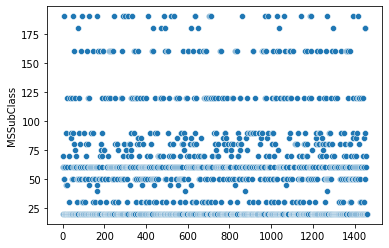

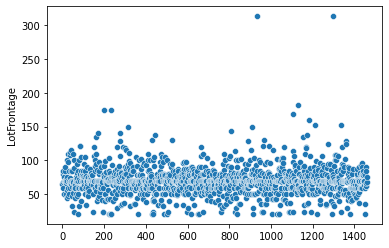

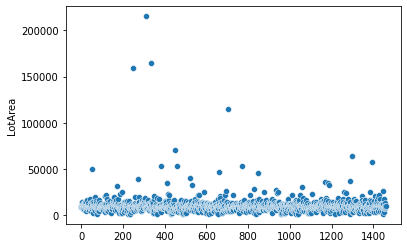

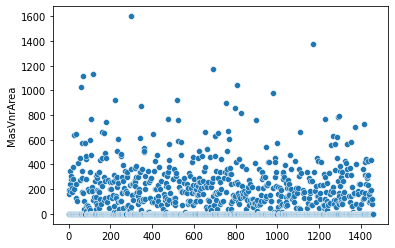

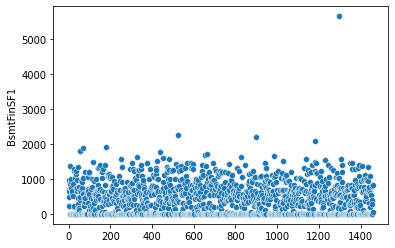

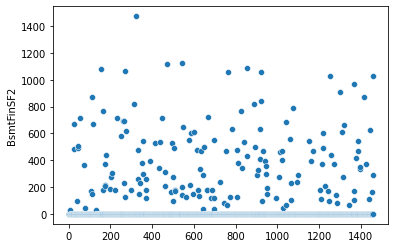

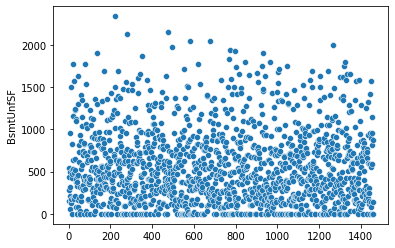

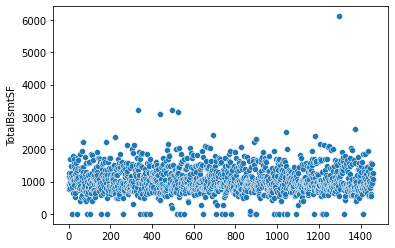

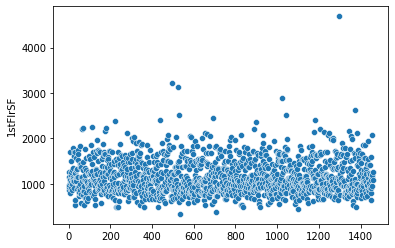

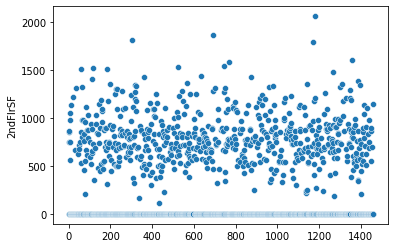

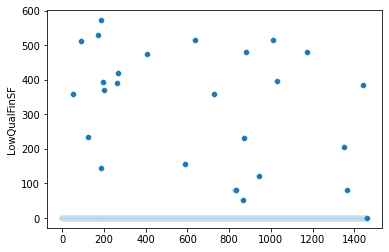

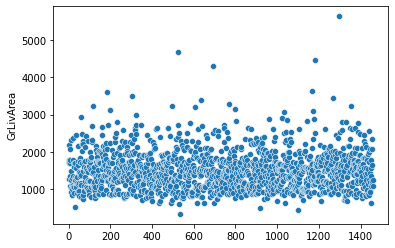

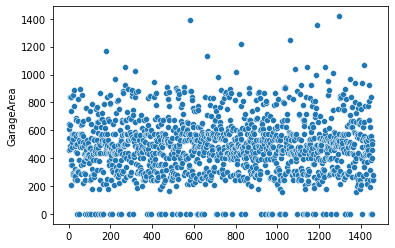

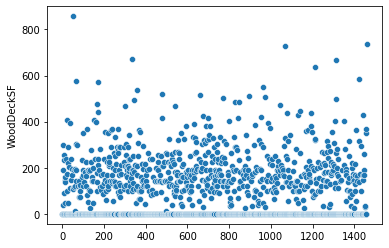

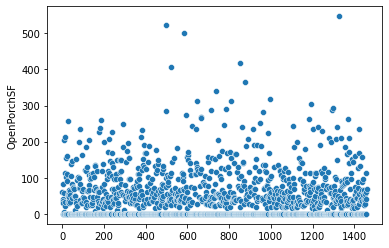

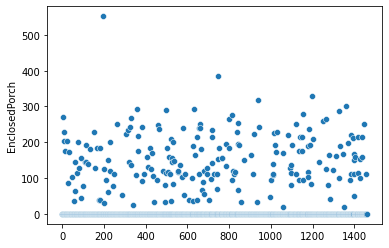

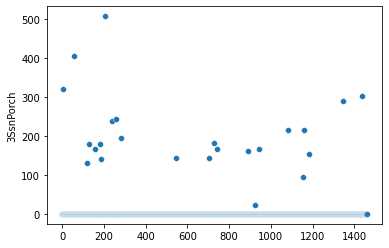

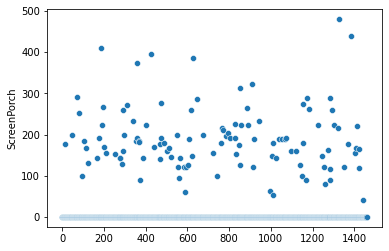

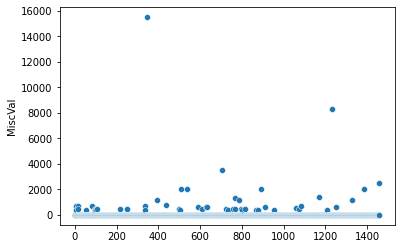

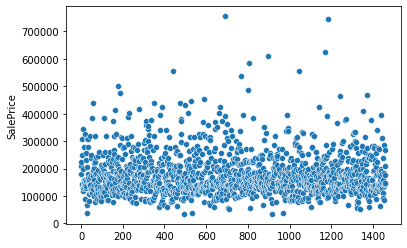

In [ ]:
#plotting plot for a dataset to check outliers.
for i in cols_num_con:
    sns.scatterplot(data=df, x=df[i].index, y=i)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


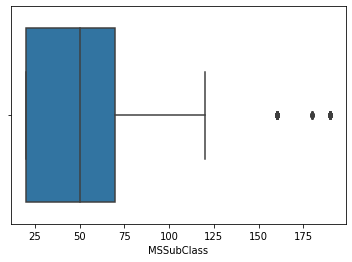

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


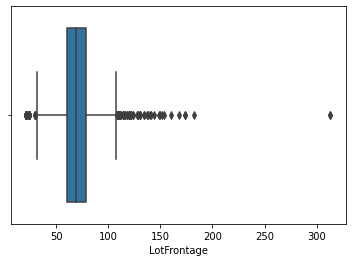

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


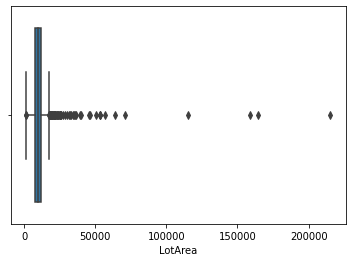

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


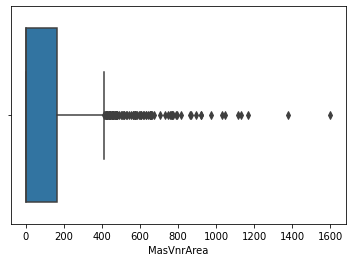

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


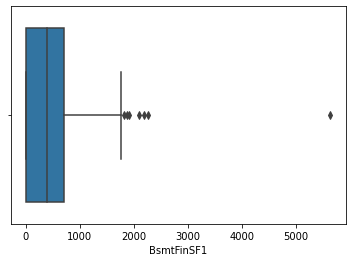

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


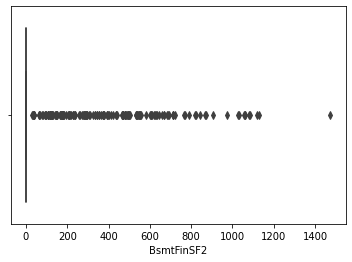

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


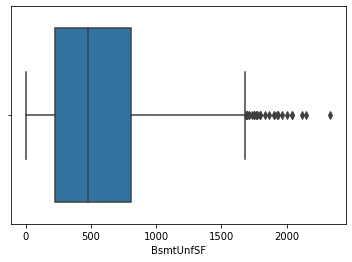

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


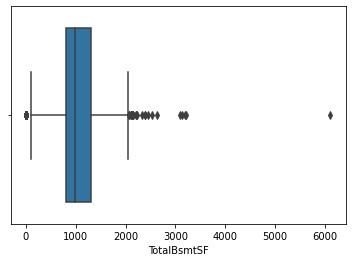

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


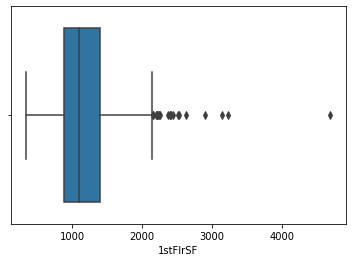

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


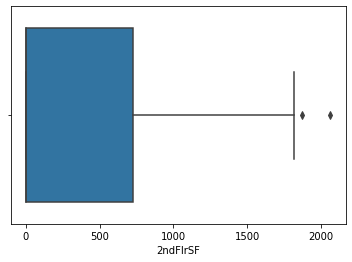

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


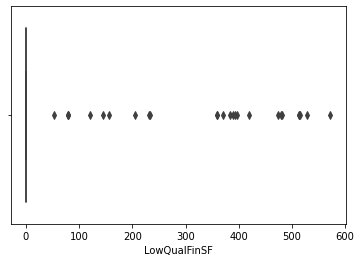

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


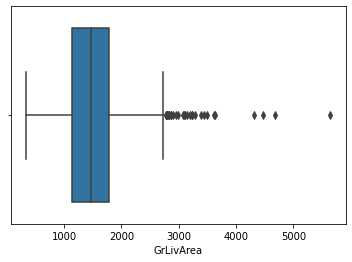

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


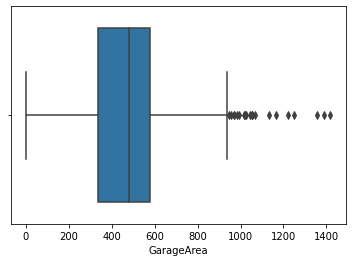

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


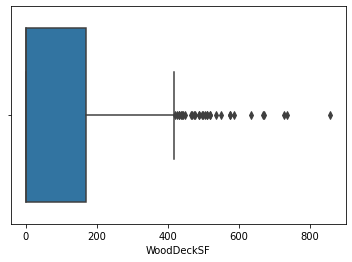

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


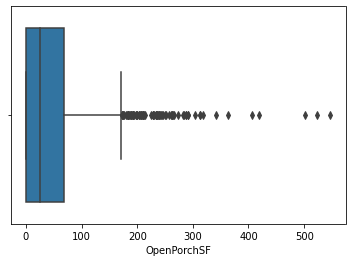

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


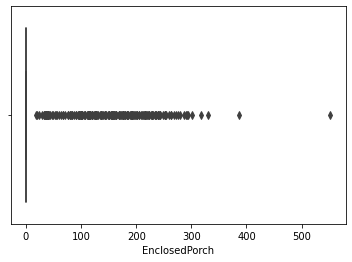

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


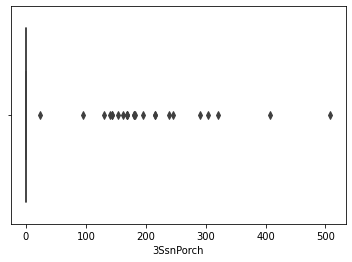

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


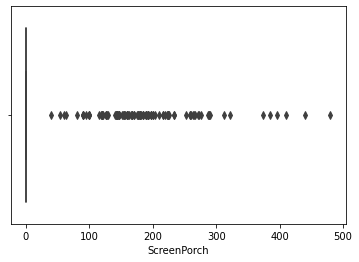

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


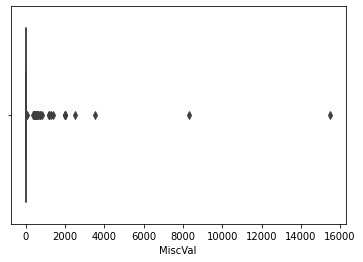

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


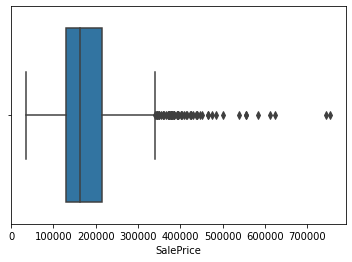

In [ ]:
#plotting scatter-plot for a dataset to check outliers.
for i in cols_num_con:
    sns.boxplot(df[i])
    plt.show()

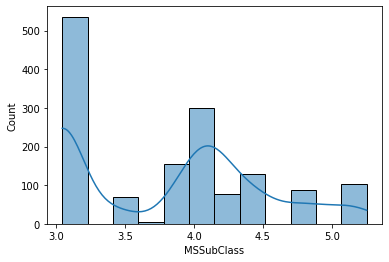

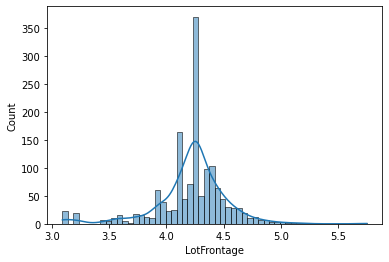

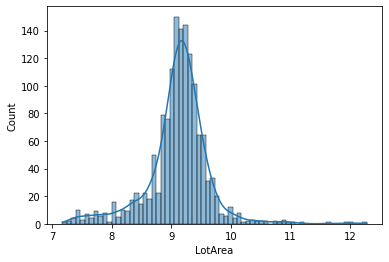

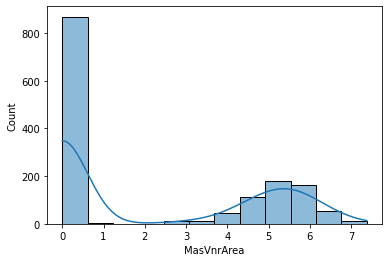

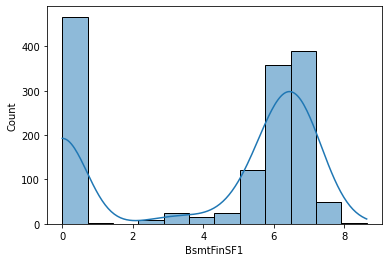

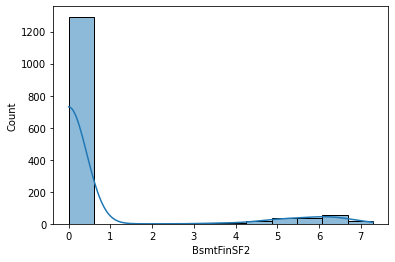

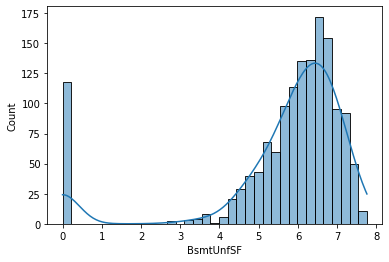

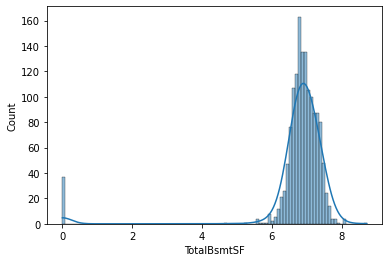

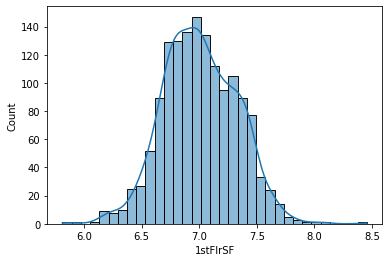

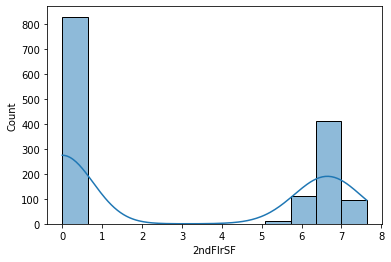

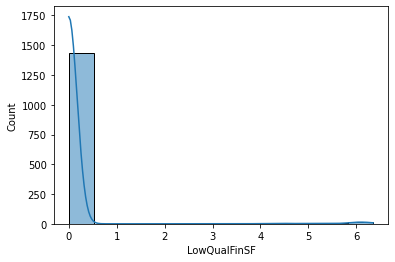

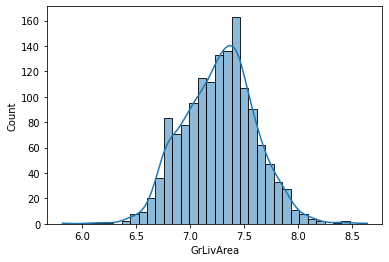

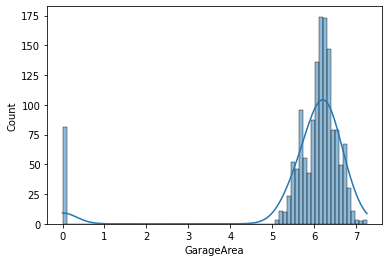

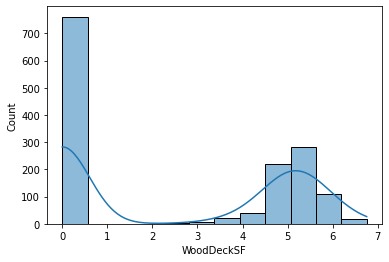

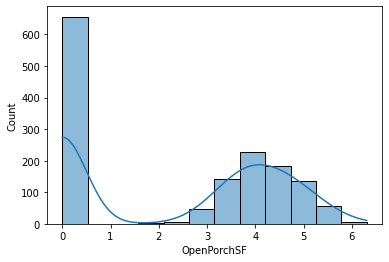

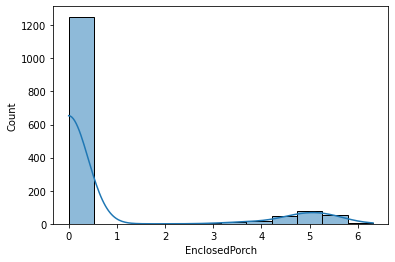

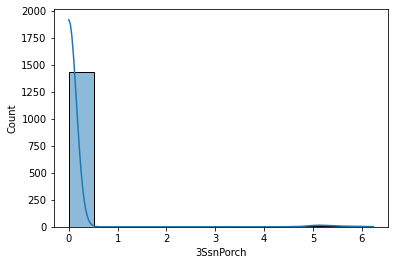

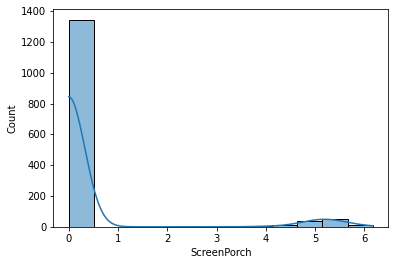

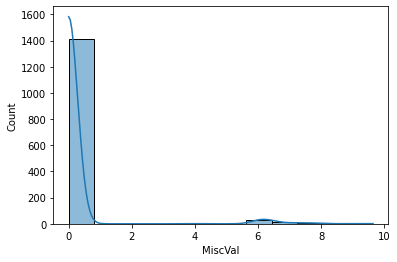

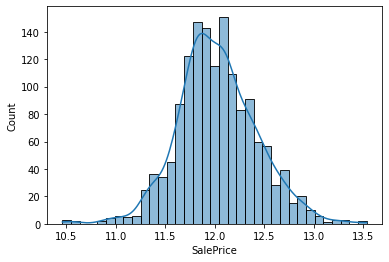

In [ ]:
for i in cols_num_con:
    df[i] = np.log(df[i]+1)
    sns.histplot(df[i], kde=True)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


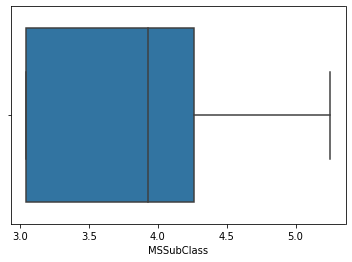

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


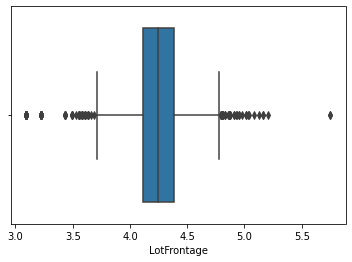

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


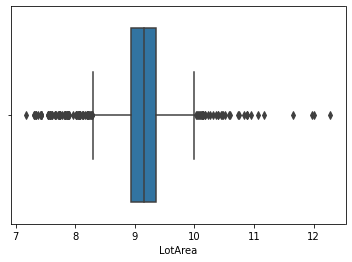

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


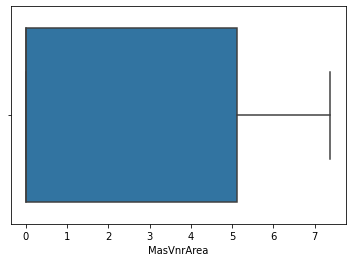

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


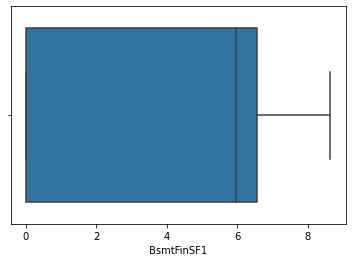

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


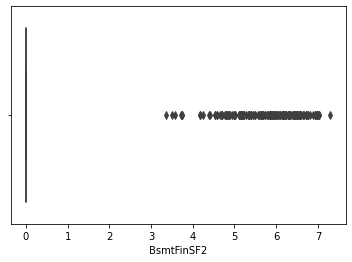

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


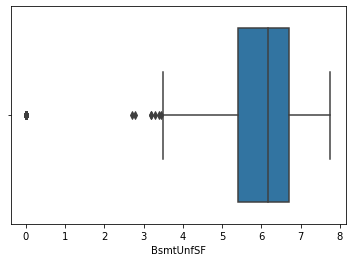

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


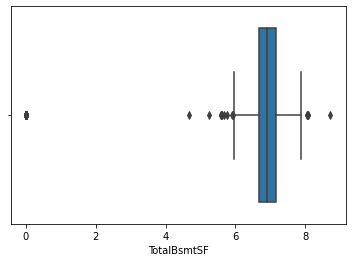

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


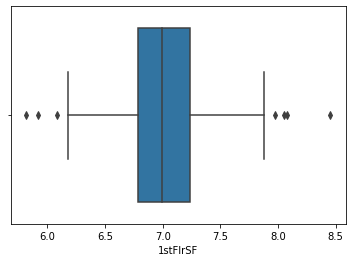

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


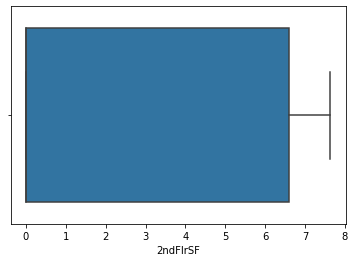

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


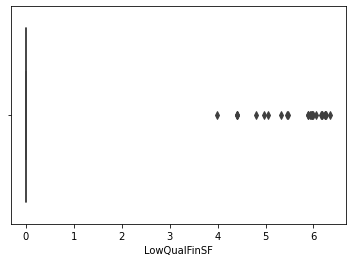

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


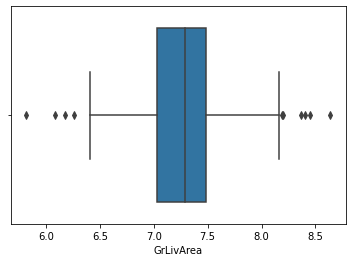

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


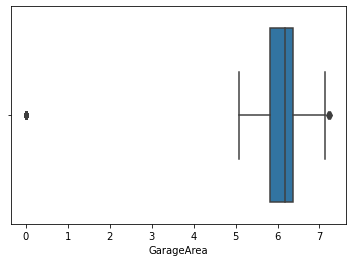

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


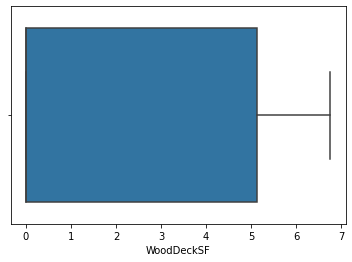

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


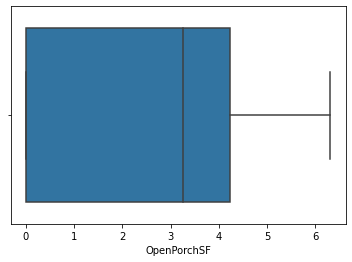

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


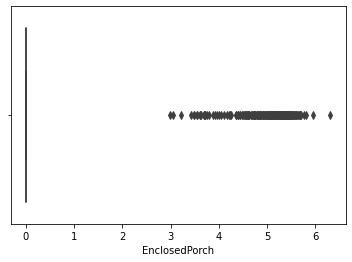

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


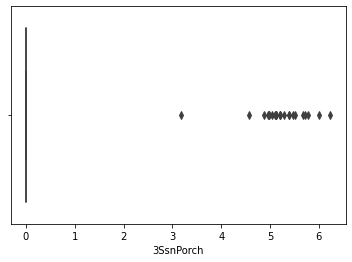

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


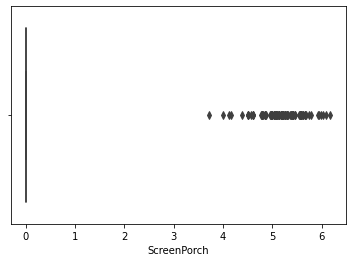

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


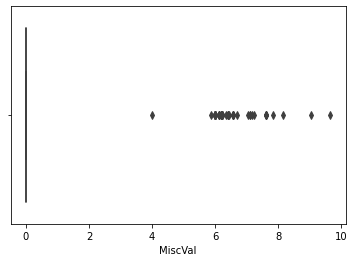

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


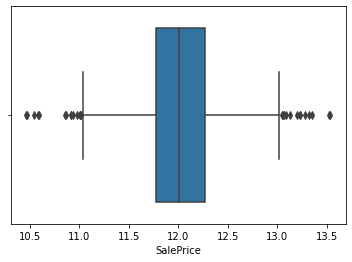

In [ ]:
for i in cols_num_con:
    sns.boxplot(df[i])
    plt.show()

In [ ]:
df[cols_num_con].head()

MSSubClass  LotFrontage   LotArea  ...  ScreenPorch  MiscVal  SalePrice
0    4.110874     4.189655  9.042040  ...          0.0      0.0  12.247699
1    3.044522     4.394449  9.169623  ...          0.0      0.0  12.109016
2    4.110874     4.234107  9.328212  ...          0.0      0.0  12.317171
3    4.262680     4.110874  9.164401  ...          0.0      0.0  11.849405
4    4.110874     4.442651  9.565284  ...          0.0      0.0  12.429220

[5 rows x 20 columns]

In [ ]:
#handling descrete col
df[cols_num_dis].head()

OverallQual  OverallCond  BsmtFullBath  ...  GarageCars  PoolArea  MoSold
0            7            5             1  ...           2         0       2
1            6            8             0  ...           2         0       5
2            7            5             1  ...           2         0       9
3            7            5             1  ...           3         0       2
4            8            5             1  ...           3         0      12

[5 rows x 13 columns]

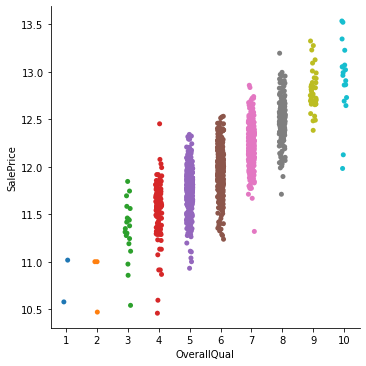

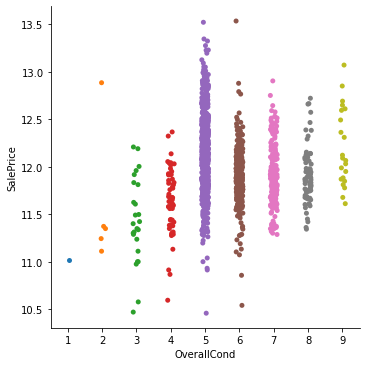

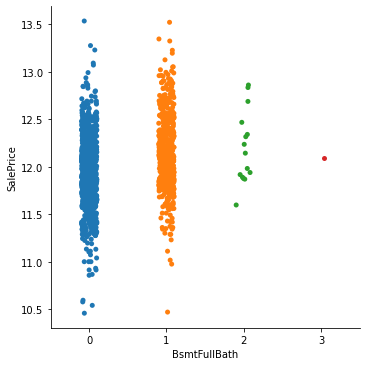

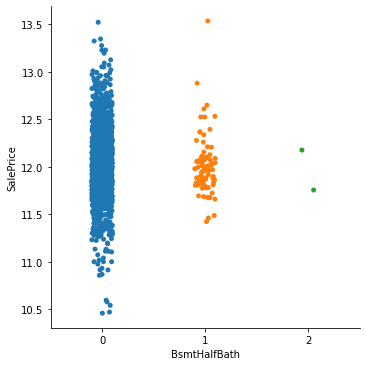

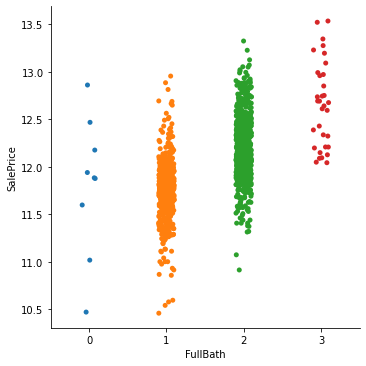

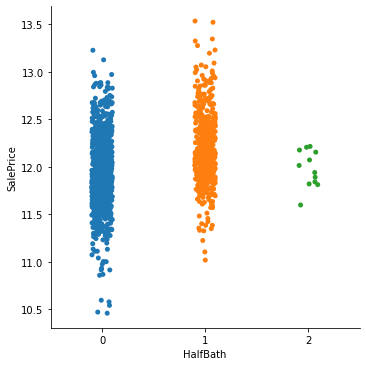

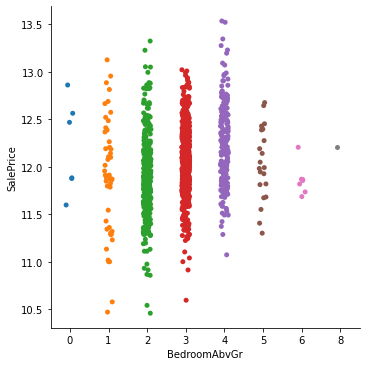

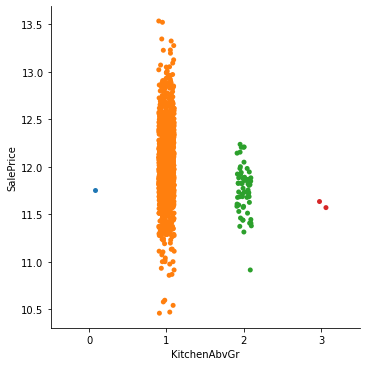

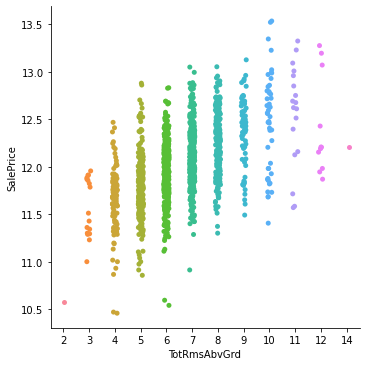

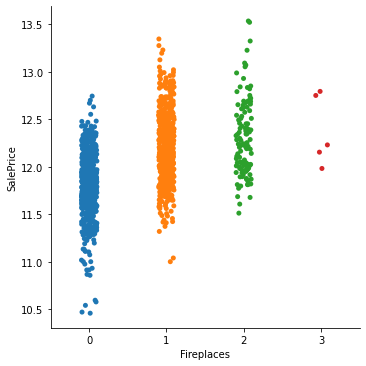

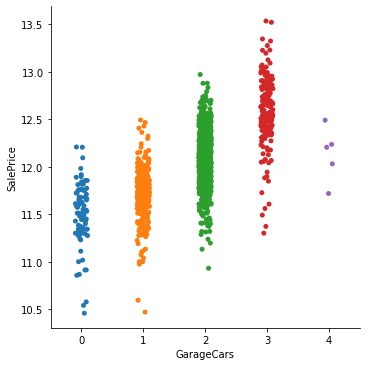

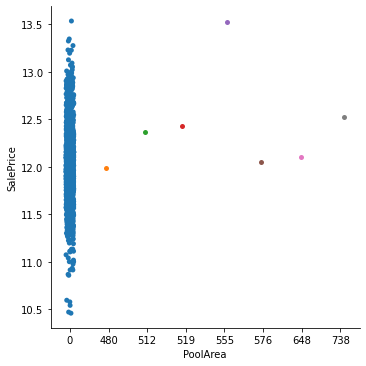

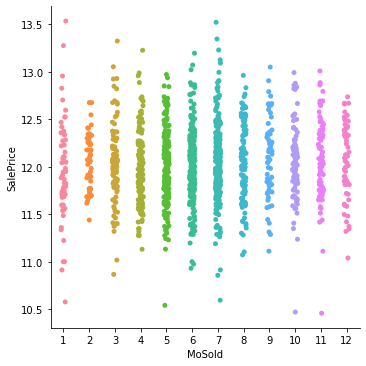

In [ ]:
for i in cols_num_dis:
    sns.catplot(x=i,y='SalePrice',data=df)
    plt.show()

In [ ]:
df[cols_num_dis].head()

OverallQual  OverallCond  BsmtFullBath  ...  GarageCars  PoolArea  MoSold
0            7            5             1  ...           2         0       2
1            6            8             0  ...           2         0       5
2            7            5             1  ...           2         0       9
3            7            5             1  ...           3         0       2
4            8            5             1  ...           3         0      12

[5 rows x 13 columns]

In [ ]:
Cond = df.groupby(['OverallCond']).SalePrice.agg([len, min, max])
Cond

len        min        max
OverallCond                             
1              1.0  11.018646  11.018646
2              5.0  11.112463  12.885205
3             25.0  10.471978  12.209193
4             57.0  10.596660  12.367345
5            821.0  10.460271  13.521141
6            252.0  10.542733  13.534474
7            205.0  11.288544  12.904210
8             72.0  11.344519  12.721889
9             22.0  11.612780  13.071072

In [ ]:
Qual = df.groupby(['OverallQual']).SalePrice.agg([len, min, max])
Qual

len        min        max
OverallQual                             
1              2.0  10.579005  11.018646
2              3.0  10.471978  11.002117
3             20.0  10.542733  11.846544
4            116.0  10.460271  12.452937
5            397.0  10.933000  12.341263
6            374.0  11.238502  12.531776
7            319.0  11.320566  12.858322
8            168.0  11.711785  13.195616
9             43.0  12.384223  13.323929
10            18.0  11.982935  13.534474

In [ ]:
df['OverallCond'] = np.where((df.OverallCond<3), 3, df.OverallCond)

In [ ]:
#combining overallQual[1,2,3,4]-4
#combining overallQual[8,9,10]-8
df['OverallQual'] = np.where((df.OverallQual>8 ), 8, df.OverallQual)
df['OverallQual'] = np.where((df.OverallQual<4 ), 4, df.OverallQual)

In [ ]:
df.groupby(['BsmtFullBath']).SalePrice.agg([len, min, max])


len        min        max
BsmtFullBath                             
0             856.0  10.460271  13.534474
1             588.0  10.471978  13.521141
2              15.0  11.598736  12.861001
3               1.0  12.095147  12.095147

In [ ]:
df['BsmtFullBath'] = np.where((df.BsmtFullBath>0 ), 1, df.BsmtFullBath)


In [ ]:
df.groupby(['BsmtHalfBath']).SalePrice.agg([len, min, max])

len        min        max
BsmtHalfBath                              
0             1378.0  10.460271  13.521141
1               80.0  11.424105  13.534474
2                2.0  11.755879  12.176654

In [ ]:
df['BsmtHalfBath'] = np.where((df.BsmtHalfBath!=0), 1,df.BsmtHalfBath)

In [ ]:
df.groupby(['FullBath']).SalePrice.agg([len, min, max])

len        min        max
FullBath                             
0           9.0  10.471978  12.861001
1         650.0  10.460271  12.955130
2         768.0  10.915107  13.323929
3          33.0  12.043560  13.534474

In [ ]:
df['FullBath'] = np.where((df.FullBath!=0 ), 1,df.FullBath)

In [ ]:
df.groupby(['HalfBath']).SalePrice.agg([len, min, max])

len        min        max
HalfBath                             
0         913.0  10.460271  13.226725
1         535.0  11.018646  13.534474
2          12.0  11.598736  12.215037

In [ ]:
df['HalfBath'] = np.where((df.HalfBath!=0 ), 1, df.HalfBath)

In [ ]:
df.groupby(['BedroomAbvGr']).SalePrice.agg([len, min, max])

len        min        max
BedroomAbvGr                             
0               6.0  11.598736  12.861001
1              50.0  10.471978  13.126033
2             358.0  10.460271  13.323929
3             804.0  10.596660  13.021329
4             213.0  11.074436  13.534474
5              21.0  11.302217  12.676079
6               7.0  11.686887  12.206078
8               1.0  12.206078  12.206078

In [ ]:
df['BedroomAbvGr'] = np.where((df.BedroomAbvGr<2 ), 2, df.BedroomAbvGr)
df['BedroomAbvGr'] = np.where((df.BedroomAbvGr>4 ), 4, df.BedroomAbvGr)

In [ ]:
df.groupby(['KitchenAbvGr']).SalePrice.agg([len, min, max])


len        min        max
KitchenAbvGr                              
0                1.0  11.755879  11.755879
1             1392.0  10.460271  13.534474
2               65.0  10.915107  12.237092
3                2.0  11.571204  11.635152

In [ ]:
df['KitchenAbvGr'] = np.where((df.KitchenAbvGr<1 ), 1, df.KitchenAbvGr)
df['KitchenAbvGr'] = np.where((df.KitchenAbvGr>2 ), 2, df.KitchenAbvGr)

In [ ]:
df.groupby(['TotRmsAbvGrd']).SalePrice.agg([len, min, max])

len        min        max
TotRmsAbvGrd                             
2               1.0  10.579005  10.579005
3              17.0  11.002117  11.956976
4              97.0  10.460271  12.468441
5             275.0  10.859018  12.880294
6             402.0  10.542733  12.832014
7             329.0  10.915107  13.049795
8             187.0  11.302217  13.053015
9              75.0  11.492733  13.126033
10             47.0  11.407576  13.534474
11             18.0  11.571204  13.323929
12             11.0  11.870278  13.275829
14              1.0  12.206078  12.206078

In [ ]:
df['TotRmsAbvGrd'] = np.where((df.TotRmsAbvGrd>10 ), 10, df.TotRmsAbvGrd)
df['TotRmsAbvGrd'] = np.where((df.TotRmsAbvGrd<3 ), 3, df.TotRmsAbvGrd)

In [ ]:
df.groupby(['Fireplaces']).SalePrice.agg([len, min, max])

len        min        max
Fireplaces                             
0           690.0  10.460271  12.744447
1           650.0  11.002117  13.345509
2           115.0  11.512935  13.534474
3             5.0  11.982935  12.793862

In [ ]:
df['Fireplaces'] = np.where((df.Fireplaces!=0 ), 1, df.Fireplaces)

In [ ]:
df.groupby(['GarageCars']).SalePrice.agg([len, min, max])

len        min        max
GarageCars                             
0            81.0  10.460271  12.208575
1           369.0  10.471978  12.493133
2           824.0  10.933000  12.971543
3           181.0  11.302217  13.534474
4             5.0  11.719948  12.491176

In [ ]:
df['GarageCars'] = np.where((df.GarageCars==4 ), 3, df.GarageCars)


In [ ]:
#month sold
df.groupby(['MoSold']).SalePrice.agg([len, min, max])

len        min        max
MoSold                             
1        58.0  10.579005  13.534474
2        52.0  11.440366  12.676079
3       106.0  10.868587  13.323929
4       141.0  11.133143  13.226725
5       204.0  10.542733  12.971543
6       253.0  10.933000  13.195616
7       234.0  10.596660  13.521141
8       122.0  11.074436  12.962197
9        63.0  11.112463  13.049795
10       89.0  10.471978  12.991756
11       79.0  10.460271  13.008662
12       59.0  11.041064  12.736704

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


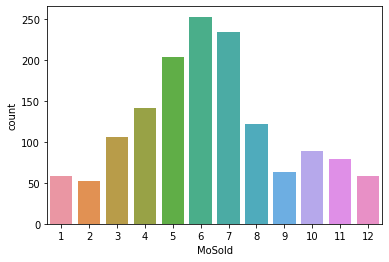

In [ ]:
sns.countplot(df['MoSold'])

In [ ]:
df.groupby(['PoolArea']).SalePrice.agg([len, min, max])

len        min        max
PoolArea                              
0         1453.0  10.460271  13.534474
480          1.0  11.982935  11.982935
512          1.0  12.367345  12.367345
519          1.0  12.429220  12.429220
555          1.0  13.521141  13.521141
576          1.0  12.049425  12.049425
648          1.0  12.106258  12.106258
738          1.0  12.524421  12.524421

In [ ]:
df['PoolArea'] = np.where((df.PoolArea!=0 ), 1, df.PoolArea)


In [ ]:
df.groupby(['PoolArea']).SalePrice.agg([len, min, max])

len        min        max
PoolArea                              
0         1453.0  10.460271  13.534474
1            7.0  11.982935  13.521141

In [ ]:
#handling year columns
df[all_year].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

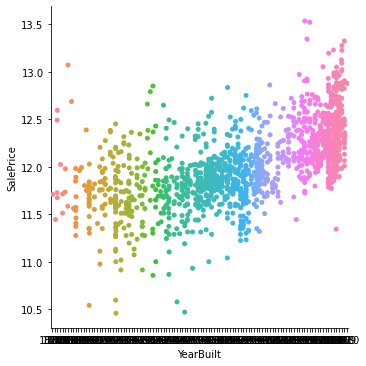

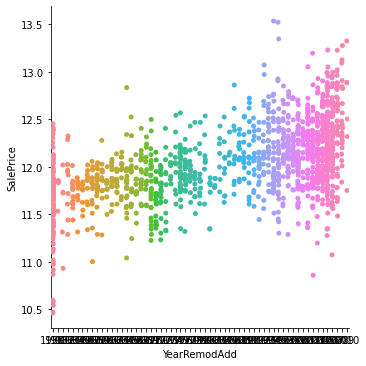

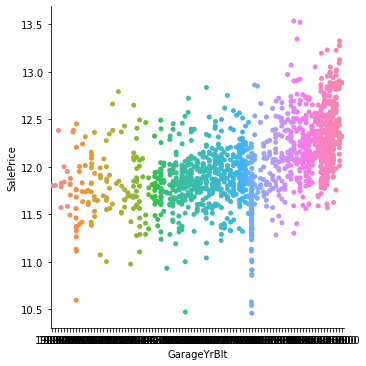

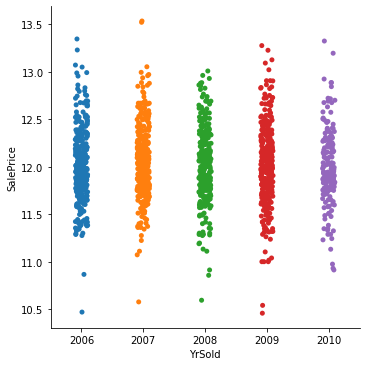

In [ ]:
#newer houses have more salePrice than older ones.
for i in all_year:
    sns.catplot(x=i, y='SalePrice', data=df)
    plt.show()

In [ ]:
#HAndling catagorical columns


In [ ]:
df[cols_str].head()

MSZoning Street LotShape  ... PavedDrive SaleType SaleCondition
0       RL   Pave      Reg  ...          Y       WD        Normal
1       RL   Pave      Reg  ...          Y       WD        Normal
2       RL   Pave      IR1  ...          Y       WD        Normal
3       RL   Pave      IR1  ...          Y       WD       Abnorml
4       RL   Pave      IR1  ...          Y       WD        Normal

[5 rows x 38 columns]

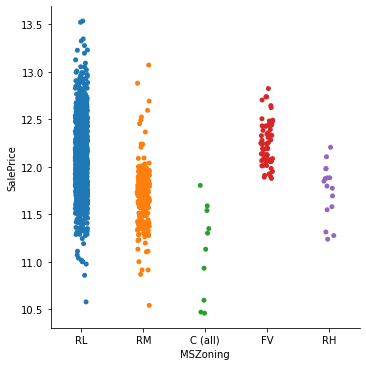

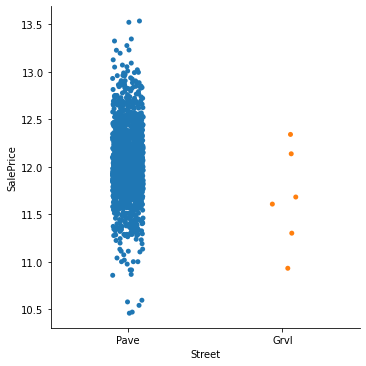

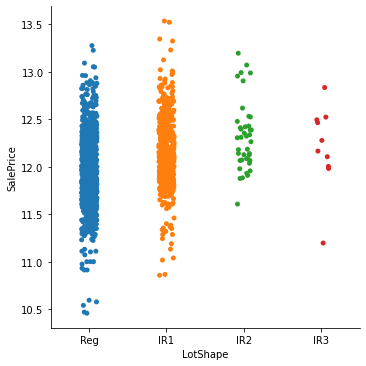

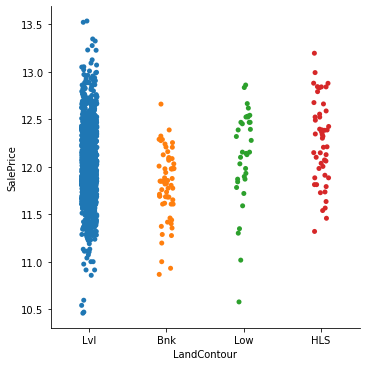

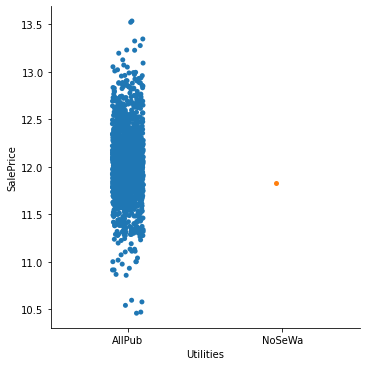

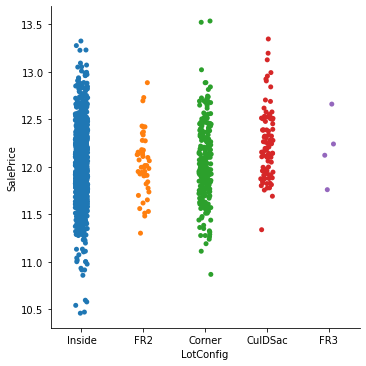

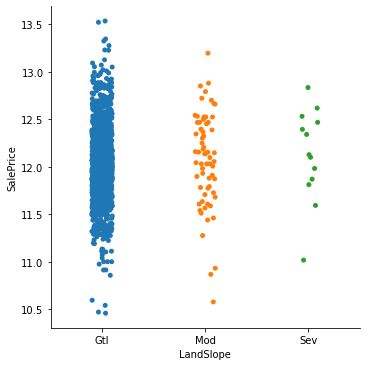

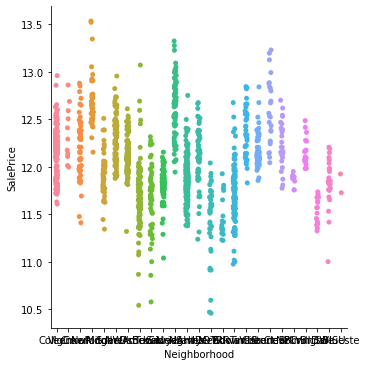

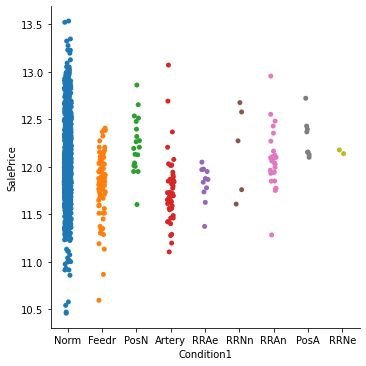

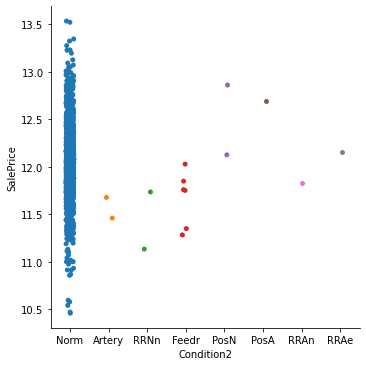

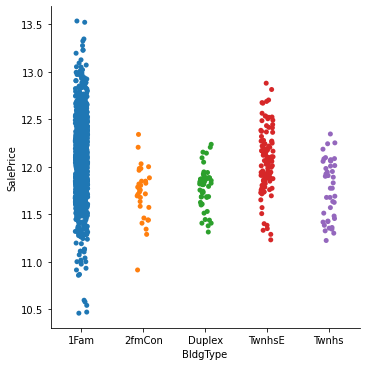

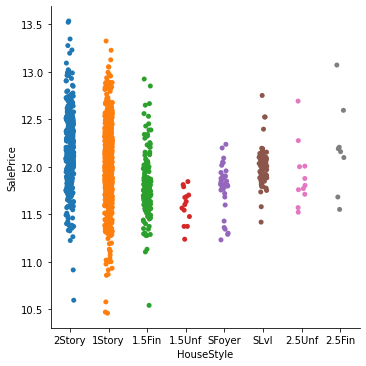

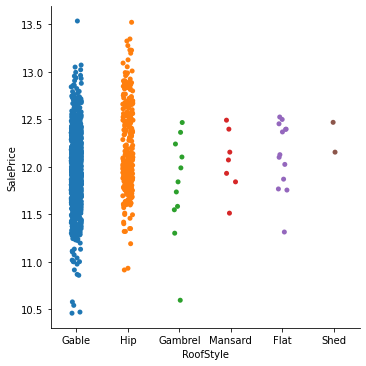

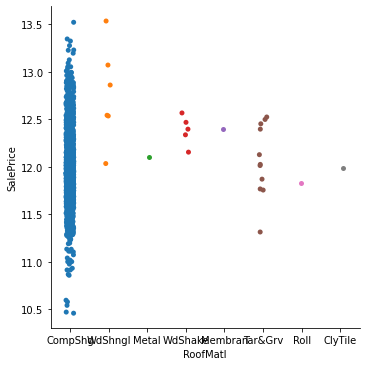

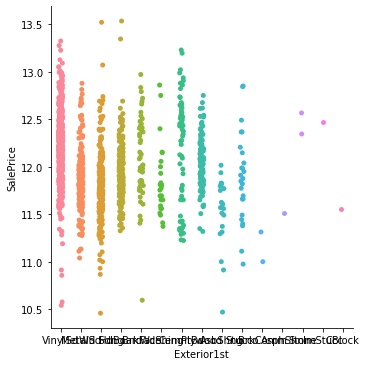

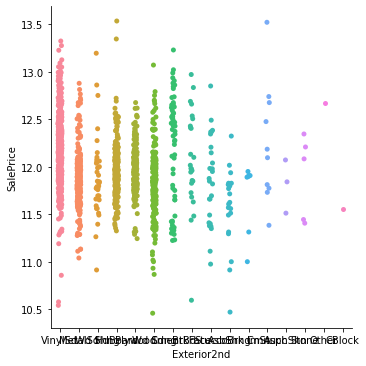

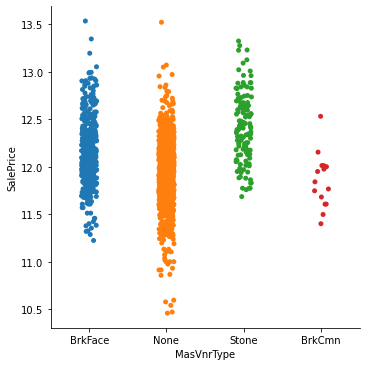

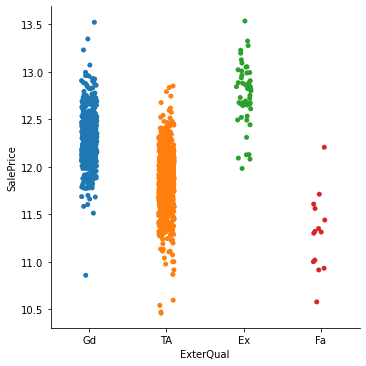

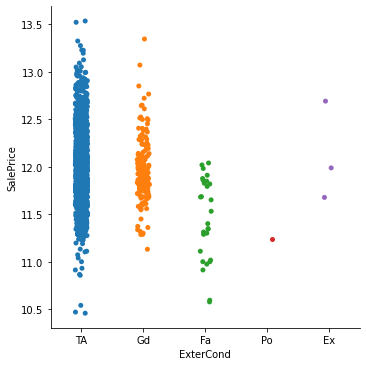

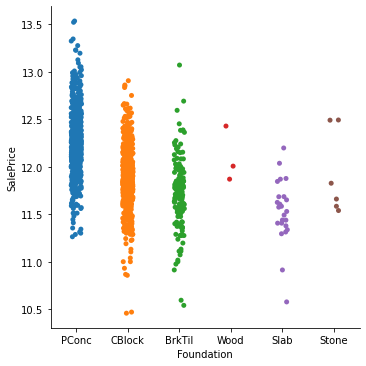

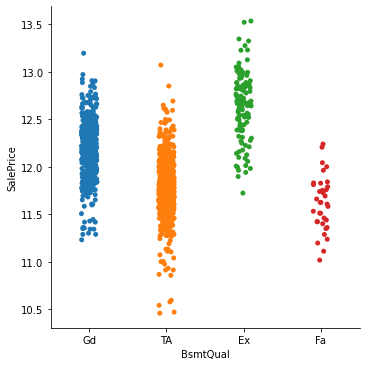

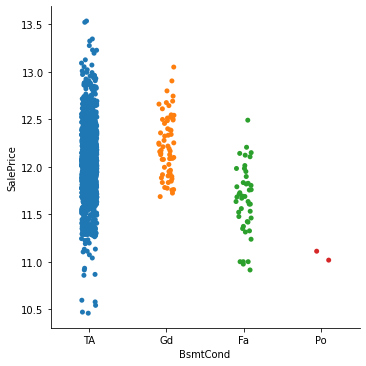

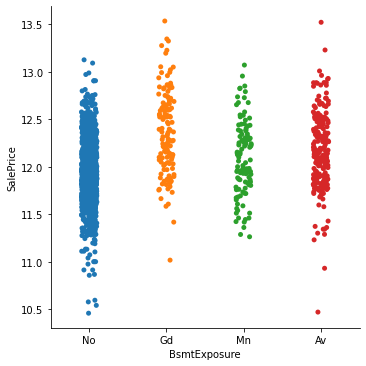

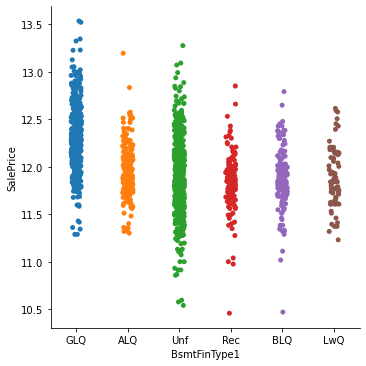

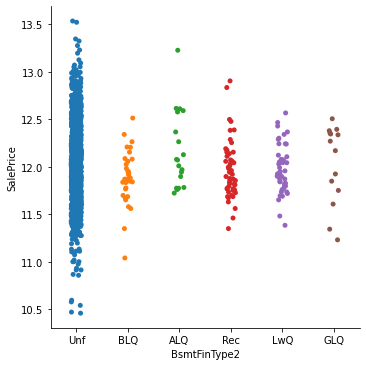

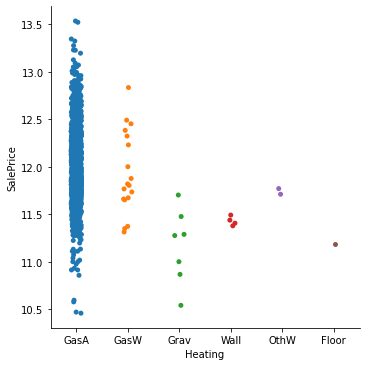

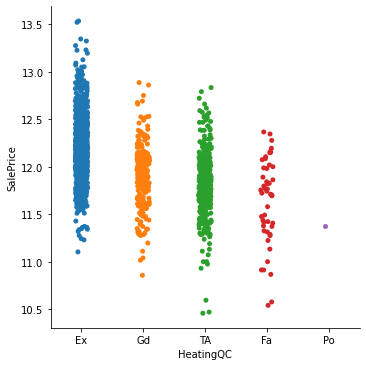

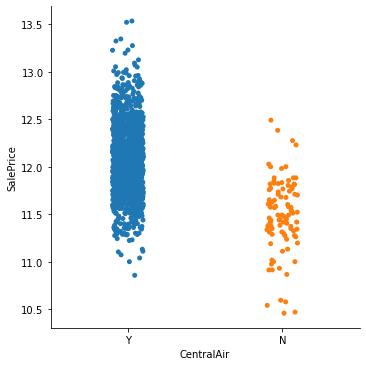

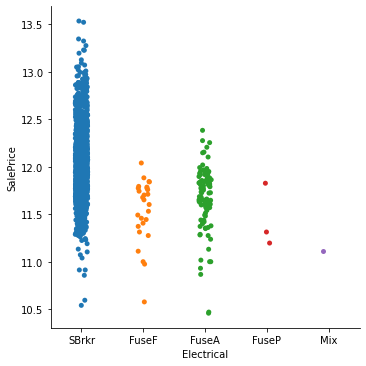

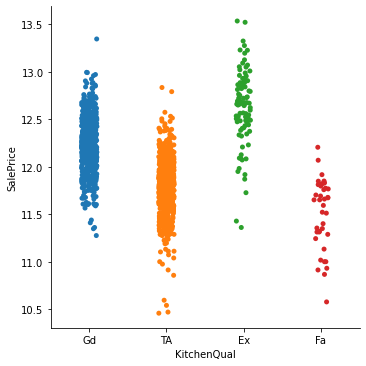

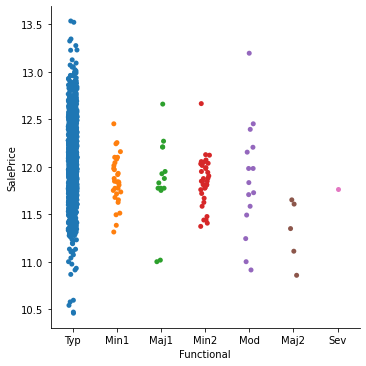

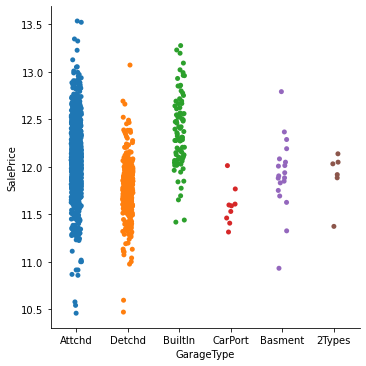

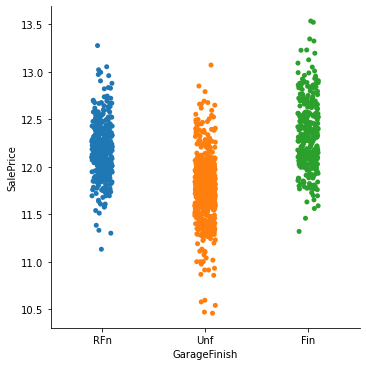

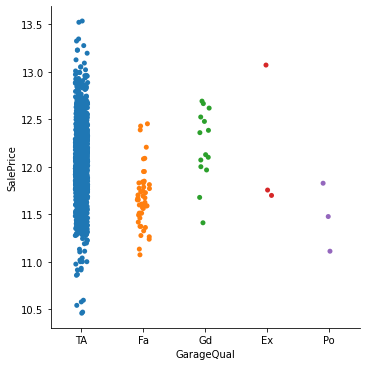

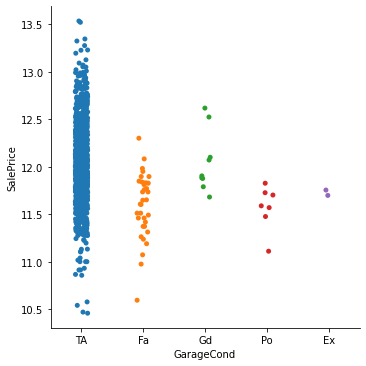

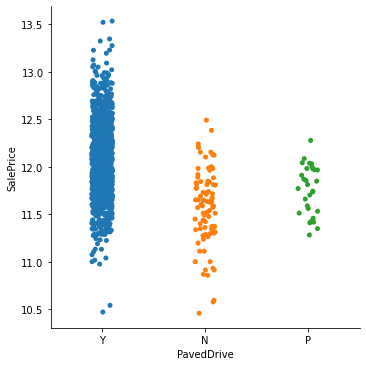

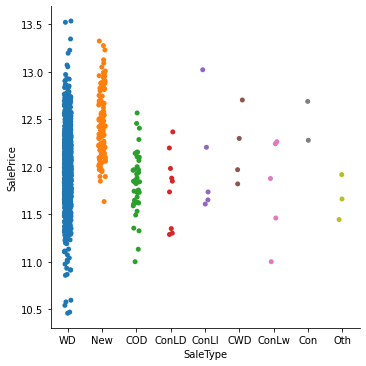

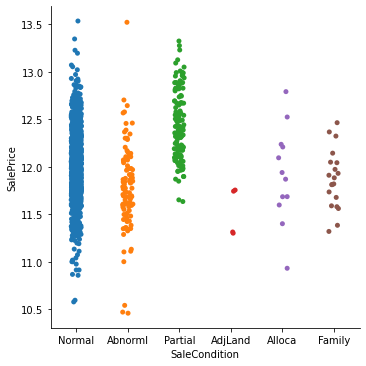

In [ ]:
for i in cols_str:
    sns.catplot(x = i, y = 'SalePrice', data = df)
    plt.show()

In [ ]:
for i in cols_str:
    print(df[i].value_counts(normalize=True)*100)
    print()

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64

Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64

Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64

Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64

Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timbe

In [ ]:
# there are some columns in which more than 90% values are same, we can drop that record
df.drop(['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtCond','Heating',
               'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive'],
              axis=1, inplace=True)

In [ ]:
df.groupby(['MSZoning']).SalePrice.agg([len, min, max])

len        min        max
MSZoning                              
C (all)     10.0  10.460271  11.804856
FV          65.0  11.878631  12.823631
RH          16.0  11.238502  12.206078
RL        1151.0  10.579005  13.534474
RM         218.0  10.542733  13.071072

In [ ]:
df['MSZoning'] = np.where((df.MSZoning=='RL' ), 1, 0)


In [ ]:
df.groupby(['LotShape']).SalePrice.agg([len, min, max])

len        min        max
LotShape                             
IR1       484.0  10.859018  13.534474
IR2        41.0  11.608245  13.195616
IR3        10.0  11.198228  12.834684
Reg       925.0  10.460271  13.275829

In [ ]:
df['LotShape'] = np.where((df.LotShape=='Reg' ), 1, 0)

In [ ]:
df.groupby(['LandContour']).SalePrice.agg([len, min, max])

len        min        max
LandContour                              
Bnk            63.0  10.868587  12.660331
HLS            50.0  11.320566  13.195616
Low            36.0  10.579005  12.861001
Lvl          1311.0  10.460271  13.534474

In [ ]:
df['LandContour'] = np.where((df.LandContour=='Lvl' ), 1, 0)


In [ ]:
df.groupby(['LotConfig']).SalePrice.agg([len, min, max])

len        min        max
LotConfig                              
Corner      263.0  10.868587  13.534474
CulDSac      94.0  11.338584  13.345509
FR2          47.0  11.302217  12.885673
FR3           4.0  11.759793  12.660331
Inside     1052.0  10.460271  13.323929

In [ ]:
df['LotConfig'] = np.where((df.LotConfig=='Inside' ), 1, 0)

In [ ]:
df.groupby(['Condition1']).SalePrice.agg([len, min, max])

len        min        max
Condition1                              
Artery        48.0  11.104972  13.071072
Feedr         81.0  10.596660  12.407384
Norm        1260.0  10.460271  13.534474
PosA           8.0  12.100718  12.721889
PosN          19.0  11.603689  12.861001
RRAe          11.0  11.373675  12.049425
RRAn          26.0  11.283525  12.955130
RRNe           2.0  12.138869  12.178193
RRNn           5.0  11.608245  12.676079

In [ ]:
df['Condition1'] = np.where((df.Condition1=='Norm' ), 1, 0)

In [ ]:
df.groupby(['BldgType']).SalePrice.agg([len, min, max])

len        min        max
BldgType                              
1Fam      1220.0  10.460271  13.534474
2fmCon      31.0  10.915107  12.341263
Duplex      52.0  11.314487  12.237092
Twnhs       43.0  11.225257  12.345839
TwnhsE     114.0  11.231901  12.880294

In [ ]:
df['BldgType'] = np.where((df.BldgType=='1Fam' ), 1, 0)

In [ ]:
df.groupby(['RoofStyle']).SalePrice.agg([len, min, max])

len        min        max
RoofStyle                              
Flat         13.0  11.314487  12.524421
Gable      1141.0  10.460271  13.534474
Gambrel      11.0  10.596660  12.466516
Hip         286.0  10.915107  13.521141
Mansard       7.0  11.512935  12.491176
Shed          2.0  12.154785  12.468441

In [ ]:
df['RoofStyle'] = np.where((df.RoofStyle=='Gable' ), 1, 0)


In [ ]:
df.groupby(['MasVnrType']).SalePrice.agg([len, min, max])

len        min        max
MasVnrType                             
BrkCmn       15.0  11.401681  12.531776
BrkFace     445.0  11.225257  13.534474
None        872.0  10.460271  13.521141
Stone       128.0  11.686887  13.323929

In [ ]:
df['MasVnrType'] = np.where((df.MasVnrType=='None' ), 0, 1)


In [ ]:
df.groupby(['ExterQual']).SalePrice.agg([len, min, max])

len        min        max
ExterQual                             
Ex          52.0  11.982935  13.534474
Fa          14.0  10.579005  12.206078
Gd         488.0  10.859018  13.521141
TA         906.0  10.460271  12.850557

In [ ]:
df['ExterQual'] = np.where((df.ExterQual=='TA' ), 1, 0)

In [ ]:
df.groupby(['ExterCond']).SalePrice.agg([len, min, max])

len        min        max
ExterCond                              
Ex            3.0  11.678448  12.691584
Fa           28.0  10.579005  12.040614
Gd          146.0  11.133143  13.345509
Po            1.0  11.245059  11.245059
TA         1282.0  10.460271  13.534474

In [ ]:
df['ExterCond'] = np.where((df.ExterCond=='TA' ), 1, 0)

In [ ]:

df.groupby(['Foundation']).SalePrice.agg([len, min, max])

len        min        max
Foundation                             
BrkTil      146.0  10.542733  13.071072
CBlock      634.0  10.460271  12.906349
PConc       647.0  11.264477  13.534474
Slab         24.0  10.579005  12.198549
Stone         6.0  11.540317  12.493133
Wood          3.0  11.870607  12.429220

In [ ]:
df['Foundation'] = np.where((df.Foundation=='PConc' ), 1,0 )

In [ ]:
df.groupby(['Foundation']).SalePrice.agg([len, min, max])

len        min        max
Foundation                             
0           813.0  10.460271  13.071072
1           647.0  11.264477  13.534474

In [ ]:
df.groupby(['BsmtQual']).SalePrice.agg([len, min, max])

len        min        max
BsmtQual                             
Ex        121.0  11.724005  13.534474
Fa         35.0  11.018646  12.239996
Gd        618.0  11.231901  13.195616
TA        686.0  10.460271  13.071072

In [ ]:
df['BsmtQual'] = np.where((df.BsmtQual=='Ex' ), 'Gd', df.BsmtQual)
df['BsmtQual'] = np.where((df.BsmtQual=='Fa' ), 'TA', df.BsmtQual)
df['BsmtQual'] = np.where((df.BsmtQual=='TA' ), 1, 0)


In [ ]:
df.groupby(['BsmtQual']).SalePrice.agg([len, min, max])

len        min        max
BsmtQual                             
0         739.0  11.231901  13.534474
1         721.0  10.460271  13.071072

In [ ]:
df.groupby(['BsmtExposure']).SalePrice.agg([len, min, max])

len        min        max
BsmtExposure                             
Av            221.0  10.471978  13.521141
Gd            134.0  11.018646  13.534474
Mn            114.0  11.264477  13.071072
No            991.0  10.460271  13.126033

In [ ]:
df['BsmtExposure'] = np.where((df.BsmtExposure=='Mn' ), 'No', df.BsmtExposure)
df['BsmtExposure'] = np.where((df.BsmtExposure=='Gd' ), 'Av', df.BsmtExposure)
df['BsmtExposure'] = np.where((df.BsmtExposure=='No' ), 1, 0)

In [ ]:
df.groupby(['GarageType']).SalePrice.agg([len, min, max])

len        min        max
GarageType                             
2Types        6.0  11.373675  12.137264
Attchd      951.0  10.460271  13.534474
Basment      19.0  10.933000  12.791359
BuiltIn      88.0  11.418626  13.275829
CarPort       9.0  11.314487  12.013101
Detchd      387.0  10.471978  13.071072

In [ ]:
df['GarageType'] = np.where((df.GarageType=='Attchd' ), 1, 0)

In [ ]:
df.groupby(['SaleType']).SalePrice.agg([len, min, max])

len        min        max
SaleType                              
COD         43.0  11.002117  12.567241
CWD          4.0  11.820418  12.703512
Con          2.0  12.279328  12.688502
ConLD        9.0  11.288544  12.367890
ConLI        5.0  11.608245  13.021329
ConLw        5.0  11.002117  12.264346
New        122.0  11.635152  13.323929
Oth          3.0  11.445727  11.918397
WD        1267.0  10.460271  13.534474

In [ ]:
df['SaleType'] = np.where((df.SaleType=='WD' ), 1, 0)


In [ ]:
df.groupby(['SaleCondition']).SalePrice.agg([len, min, max])

len        min        max
SaleCondition                              
Abnorml         101.0  10.460271  13.521141
AdjLand           4.0  11.302217  11.755879
Alloca           12.0  10.933000  12.791359
Family           20.0  11.320566  12.464587
Normal         1198.0  10.579005  13.534474
Partial         125.0  11.635152  13.323929

In [ ]:
df['SaleCondition'] = np.where((df.SaleCondition=='Normal' ), 1, 0)

In [ ]:
df.groupby(['Neighborhood']).SalePrice.agg([len, min, max])

len        min        max
Neighborhood                             
Blmngtn        17.0  11.982279  12.485831
Blueste         2.0  11.728045  11.925042
BrDale         16.0  11.326608  11.736077
BrkSide        58.0  10.579005  12.317171
ClearCr        28.0  11.775297  12.700772
CollgCr       150.0  11.608245  12.959541
Crawfor        51.0  11.411457  12.880294
Edwards       100.0  10.976799  12.676079
Gilbert        79.0  11.856522  12.841328
IDOTRR         37.0  10.460271  12.040614
MeadowV        17.0  11.225257  11.927687
Mitchel        49.0  11.344519  12.509878
NAmes         225.0  11.379406  12.751303
NPkVill         9.0  11.755879  11.951187
NWAmes         73.0  11.320566  12.610874
NoRidge        41.0  12.154785  13.534474
NridgHt        77.0  11.944714  13.323929
OldTown       113.0  10.542733  13.071072
SWISU          25.0  11.002117  12.206078
Sawyer         74.0  11.041064  12.154785
SawyerW        59.0  11.238502  12.676079
Somerst        86.0  11.878631  12.955130
StoneBr        25.0  12.043560  13.229570
Timber         38.0  11.831386  12.843974
Veenker        11.0  11.998439  12.861001

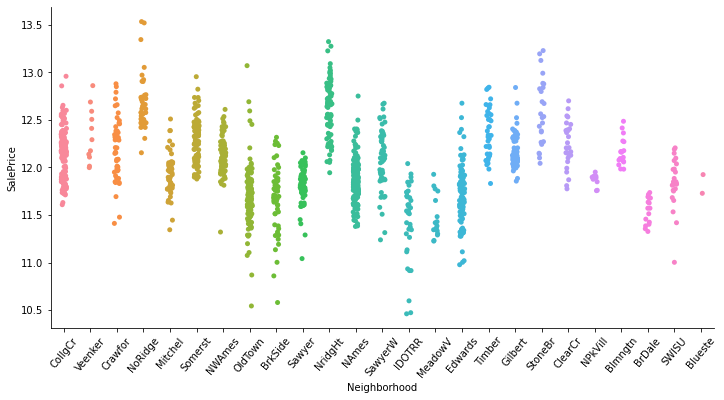

In [ ]:
a=sns.catplot(x = 'Neighborhood', y = 'SalePrice', data = df,height=5, aspect=2)
a.set_xticklabels(rotation=50)

In [ ]:
#a/c saleprice converting Neighbourhood into 3 catagory
c1 = ['CollgCr', 'Veenker', 'Crawfor', 'Mitchel',  'NWAmes', 'NAmes', 'SawyerW', 'Edwards', 'NPkVill']
c2 = ['NoRidge', 'Somerst' ,'NridgHt', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'Blmngtn']
c3 = ['OldTown', 'BrkSide', 'Sawyer', 'IDOTRR', 'MeadowV', 'BrDale', 'SWISU', 'Blueste']

In [ ]:
for i in c1:
    df['Neighborhood'] = np.where((df.Neighborhood==i), 0, df.Neighborhood)
    
for j in c2:
    df['Neighborhood'] = np.where((df.Neighborhood==j), 1, df.Neighborhood)
    
for k in c3:
    df['Neighborhood'] = np.where((df.Neighborhood==k), 2, df.Neighborhood)
    

In [ ]:
df.groupby(['GarageFinish']).SalePrice.agg([len, min, max])

len        min        max
GarageFinish                             
Fin           352.0  11.320566  13.534474
RFn           422.0  11.133143  13.275829
Unf           686.0  10.460271  13.071072

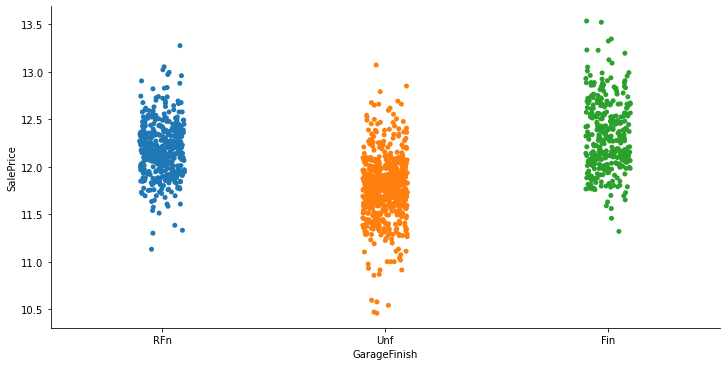

In [ ]:
sns.catplot(x = 'GarageFinish', y = 'SalePrice', data = df,height=5, aspect=2)

In [ ]:
df['GarageFinish'] = np.where((df.GarageFinish=='Unf' ), 1, 0)

In [ ]:
df.groupby(['KitchenQual']).SalePrice.agg([len, min, max])

len        min        max
KitchenQual                             
Ex           100.0  11.362114  13.534474
Fa            39.0  10.579005  12.206078
Gd           586.0  11.277216  13.345509
TA           735.0  10.460271  12.834684

In [ ]:
df['KitchenQual'] = np.where((df.KitchenQual=='Ex' ), 'Gd', df.KitchenQual)
df['KitchenQual'] = np.where((df.KitchenQual=='Fa' ), 'TA', df.KitchenQual)
df['KitchenQual'] = np.where((df.KitchenQual=='TA' ), 1, 0)

In [ ]:
df.groupby(['HeatingQC']).SalePrice.agg([len, min, max])

len        min        max
HeatingQC                             
Ex         741.0  11.104972  13.534474
Fa          49.0  10.542733  12.367345
Gd         241.0  10.859018  12.886644
Po           1.0  11.373675  11.373675
TA         428.0  10.460271  12.834684

In [ ]:
df['HeatingQC'] = np.where((df.HeatingQC=='Ex' ), 1, 0)

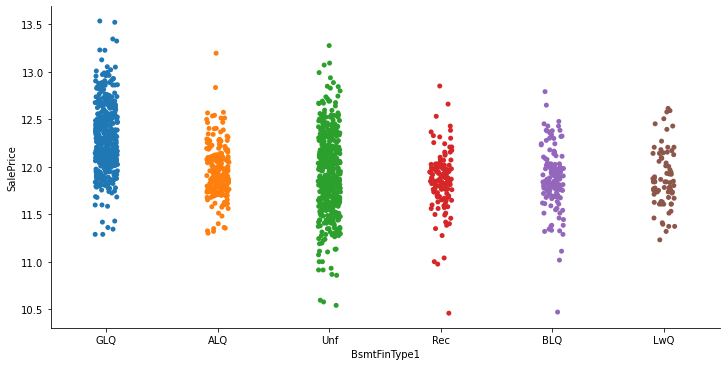

In [ ]:
ax = sns.catplot(x = 'BsmtFinType1', y = 'SalePrice', data = df,height=5, aspect=2)

In [ ]:
df['BsmtFinType1'] = np.where((df.BsmtFinType1=='Rec'), 'Unf', df.BsmtFinType1)
df['BsmtFinType1'] = np.where((df.BsmtFinType1=='BLQ'), 'Unf', df.BsmtFinType1)
df['BsmtFinType1'] = np.where((df.BsmtFinType1=='ALQ'), 'GLQ', df.BsmtFinType1)
df['BsmtFinType1'] = np.where((df.BsmtFinType1=='LwQ'), 'GLQ', df.BsmtFinType1)
df['BsmtFinType1'] = np.where((df.BsmtFinType1=='Unf' ), 1, 0)

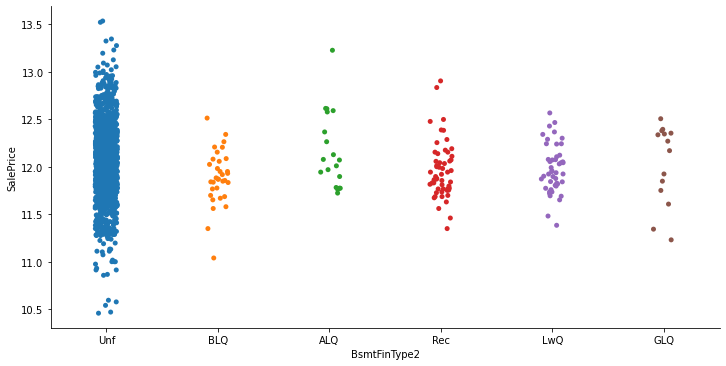

In [ ]:
sns.catplot(x = 'BsmtFinType2', y = 'SalePrice', data = df,height=5, aspect=2)

In [ ]:
df['BsmtFinType2'] = np.where((df.BsmtFinType2=='Unf' ), 1, 0)

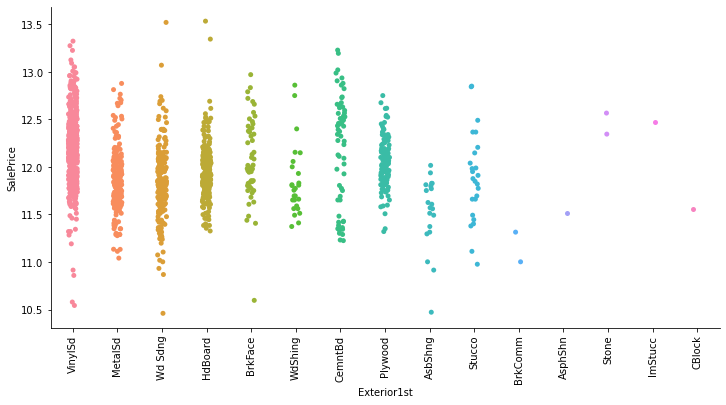

In [ ]:
b=sns.catplot(x = 'Exterior1st', y = 'SalePrice', data = df,height=5, aspect=2)
b.set_xticklabels(rotation=90)

In [ ]:
df['Exterior1st'] = np.where((df.Exterior1st=='AsbShng'), 'VinylSd', df.Exterior1st)
df['Exterior1st'] = np.where((df.Exterior1st=='BrkFace'), 'VinylSd', df.Exterior1st)
df['Exterior1st'] = np.where((df.Exterior1st=='Wd Sdng'), 'VinylSd', df.Exterior1st)
df['Exterior1st'] = np.where((df.Exterior1st=='VinylSd' ), 1, 0)

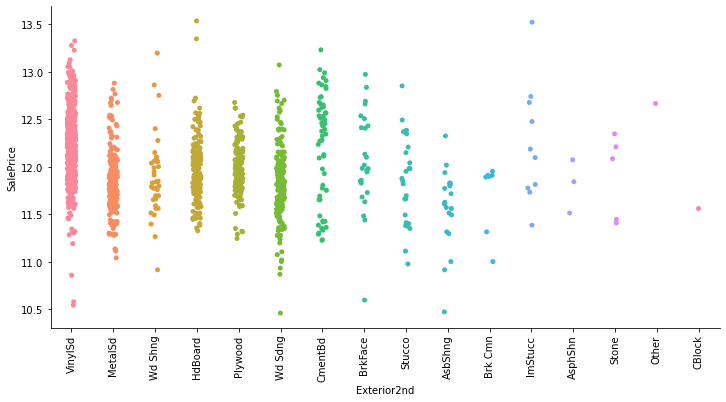

In [ ]:
c= sns.catplot(x = 'Exterior2nd', y = 'SalePrice', data = df,height=5, aspect=2)
c.set_xticklabels(rotation=90)

In [ ]:
df['Exterior2nd'] = np.where((df.Exterior2nd=='AsbShng'), 'VinylSd', df.Exterior2nd)
df['Exterior2nd'] = np.where((df.Exterior2nd=='BrkFace'), 'VinylSd', df.Exterior2nd)
df['Exterior2nd'] = np.where((df.Exterior2nd=='Wd Sdng'), 'VinylSd', df.Exterior2nd)
df['Exterior2nd'] = np.where((df.Exterior2nd=='VinylSd' ), 1, 0)


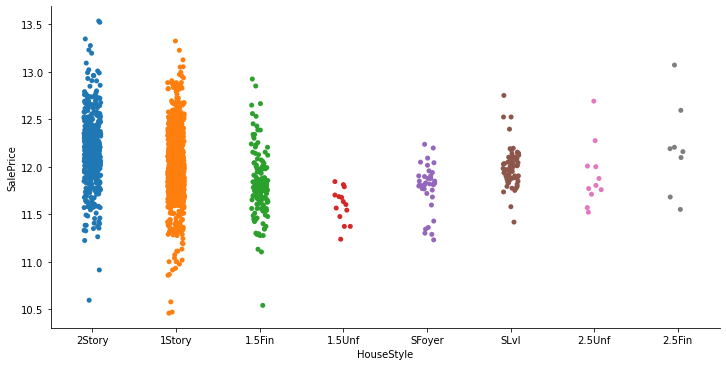

In [ ]:
sns.catplot(x = 'HouseStyle', y = 'SalePrice', data = df,height=5, aspect=2)

In [ ]:
df['HouseStyle'] = np.where((df.HouseStyle=='1.5Fin'), 'Other', df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='1.5Unf'), 'Other', df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='SFoyer'), 'Other', df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='SLvl'), 'Other', df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='2.5Unf'), 'Other', df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='2.5Fin'), 'Other', df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='Other' ), 0, df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='1Story' ), 1, df.HouseStyle)
df['HouseStyle'] = np.where((df.HouseStyle=='2Story' ), 2, df.HouseStyle)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

MSSubClass  MSZoning  LotFrontage  ...  SaleType  SaleCondition  SalePrice
0    4.110874         1     4.189655  ...         1              1  12.247699
1    3.044522         1     4.394449  ...         1              1  12.109016
2    4.110874         1     4.234107  ...         1              1  12.317171
3    4.262680         1     4.110874  ...         1              0  11.849405
4    4.110874         1     4.442651  ...         1              1  12.429220

[5 rows x 62 columns]

In [ ]:
df.info() # we have only two object columns- neighbours, Housestyle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   int64  
 9   BldgType       1460 non-null   int64  
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   int64  
 16  Exterior1st    1460 non-null   int64  
 17  Exterior2nd    1460 non-null   int64  
 18  MasVnrTy

In [ ]:
df['Neighborhood'].value_counts()

0    727
1    391
2    342
Name: Neighborhood, dtype: int64

In [ ]:
df['HouseStyle'].value_counts()

1    726
2    445
0    289
Name: HouseStyle, dtype: int64

In [ ]:
#Onehot incoding

df['HouseStyle'] = pd.get_dummies(df['HouseStyle'], drop_first=True)
df['Neighborhood'] = pd.get_dummies(df['Neighborhood'], drop_first=True)

In [ ]:
df.head()

MSSubClass  MSZoning  LotFrontage  ...  SaleType  SaleCondition  SalePrice
0    4.110874         1     4.189655  ...         1              1  12.247699
1    3.044522         1     4.394449  ...         1              1  12.109016
2    4.110874         1     4.234107  ...         1              1  12.317171
3    4.262680         1     4.110874  ...         1              0  11.849405
4    4.110874         1     4.442651  ...         1              1  12.429220

[5 rows x 62 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   LotShape       1460 non-null   int64  
 5   LandContour    1460 non-null   int64  
 6   LotConfig      1460 non-null   int64  
 7   Neighborhood   1460 non-null   uint8  
 8   Condition1     1460 non-null   int64  
 9   BldgType       1460 non-null   int64  
 10  HouseStyle     1460 non-null   uint8  
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   int64  
 16  Exterior1st    1460 non-null   int64  
 17  Exterior2nd    1460 non-null   int64  
 18  MasVnrTy

In [ ]:
X =df.drop(['SalePrice'], axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
p=pd.DataFrame([variance_inflation_factor(X_vif.values, i) 
               for i in range(X_vif.shape[1])],index=X_vif.columns)

In [ ]:
p.head(32)

0
const         2.508083e+06
MSSubClass    1.057412e+01
MSZoning      1.748032e+00
LotFrontage   2.213095e+00
LotArea       2.896854e+00
LotShape      1.366562e+00
LandContour   1.195046e+00
LotConfig     1.133938e+00
Neighborhood  1.986250e+00
Condition1    1.104181e+00
BldgType      8.532732e+00
HouseStyle    1.016170e+01
OverallQual   3.637620e+00
OverallCond   1.813585e+00
YearBuilt     7.483537e+00
YearRemodAdd  2.842154e+00
RoofStyle     1.231934e+00
Exterior1st   7.156385e+00
Exterior2nd   7.117227e+00
MasVnrType    2.041366e+01
MasVnrArea    2.095037e+01
ExterQual     2.929089e+00
ExterCond     1.155057e+00
Foundation    2.980314e+00
BsmtQual      3.157183e+00
BsmtExposure  1.655435e+00
BsmtFinType1  2.304484e+00
BsmtFinSF1    3.215593e+00
BsmtFinType2  3.560710e+01
BsmtFinSF2    3.606208e+01
BsmtUnfSF     2.511561e+00
TotalBsmtSF   2.461771e+00

In [ ]:
p.tail(32)

0
BsmtUnfSF       2.511561
TotalBsmtSF     2.461771
HeatingQC       1.759730
1stFlrSF       17.535059
2ndFlrSF       23.310230
LowQualFinSF    1.447604
GrLivArea      29.463494
BsmtFullBath    1.992778
BsmtHalfBath    1.189102
FullBath        1.142299
HalfBath        2.169209
BedroomAbvGr    2.386951
KitchenAbvGr    2.332648
KitchenQual     2.677857
TotRmsAbvGrd    4.681965
Fireplaces      1.662284
GarageType      1.684206
GarageYrBlt     3.708313
GarageFinish    2.289856
GarageCars      4.509374
GarageArea      3.263596
WoodDeckSF      1.364331
OpenPorchSF     1.518696
EnclosedPorch   1.417578
3SsnPorch       1.053749
ScreenPorch     1.130942
PoolArea        1.096184
MiscVal         1.073639
MoSold          1.080634
YrSold          1.089638
SaleType        1.853109
SaleCondition   1.817175

In [ ]:
#multi = ['SalePrice','GrLivArea', '2ndFlrSF', '1stFlrSF','BsmtFinSF2', 'BsmtFinType2', 'MasVnrArea', 'MasVnrType']

In [ ]:

multi=['SalePrice','MSSubClass','YearBuilt','Exterior2nd','GrLivArea','TotRmsAbvGrd','BsmtFinType2']

In [ ]:
df[multi].corr()

SalePrice  MSSubClass  ...  TotRmsAbvGrd  BsmtFinType2
SalePrice      1.000000   -0.020279  ...      0.541543      0.037651
MSSubClass    -0.020279    1.000000  ...      0.150781      0.079058
YearBuilt      0.586570   -0.002896  ...      0.104896      0.072138
Exterior2nd    0.167960   -0.089661  ...      0.095836      0.107127
GrLivArea      0.730254    0.197078  ...      0.827240      0.046870
TotRmsAbvGrd   0.541543    0.150781  ...      1.000000      0.051946
BsmtFinType2   0.037651    0.079058  ...      0.051946      1.000000

[7 rows x 7 columns]

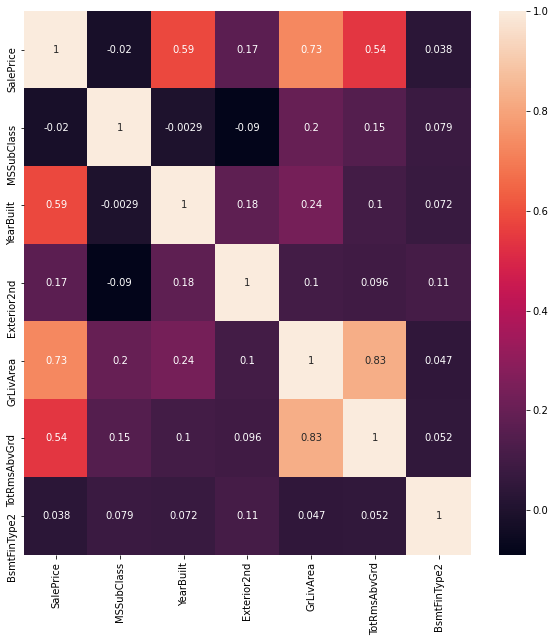

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df[multi].corr(),annot=True,ax=ax)

In [ ]:
df.drop(['BldgType'],axis = 1, inplace=True)

In [ ]:
df.drop(['BsmtQual'],axis = 1, inplace=True)

In [ ]:
df.drop(['1stFlrSF'],axis = 1, inplace=True)

In [ ]:
df.drop(['2ndFlrSF'],axis = 1, inplace=True)

In [ ]:
df.drop(['BsmtFinSF2'],axis = 1, inplace=True)

In [ ]:
df.drop(['Exterior1st'],axis = 1, inplace=True)

In [ ]:
df.drop(['GrLivArea'],axis = 1, inplace=True)


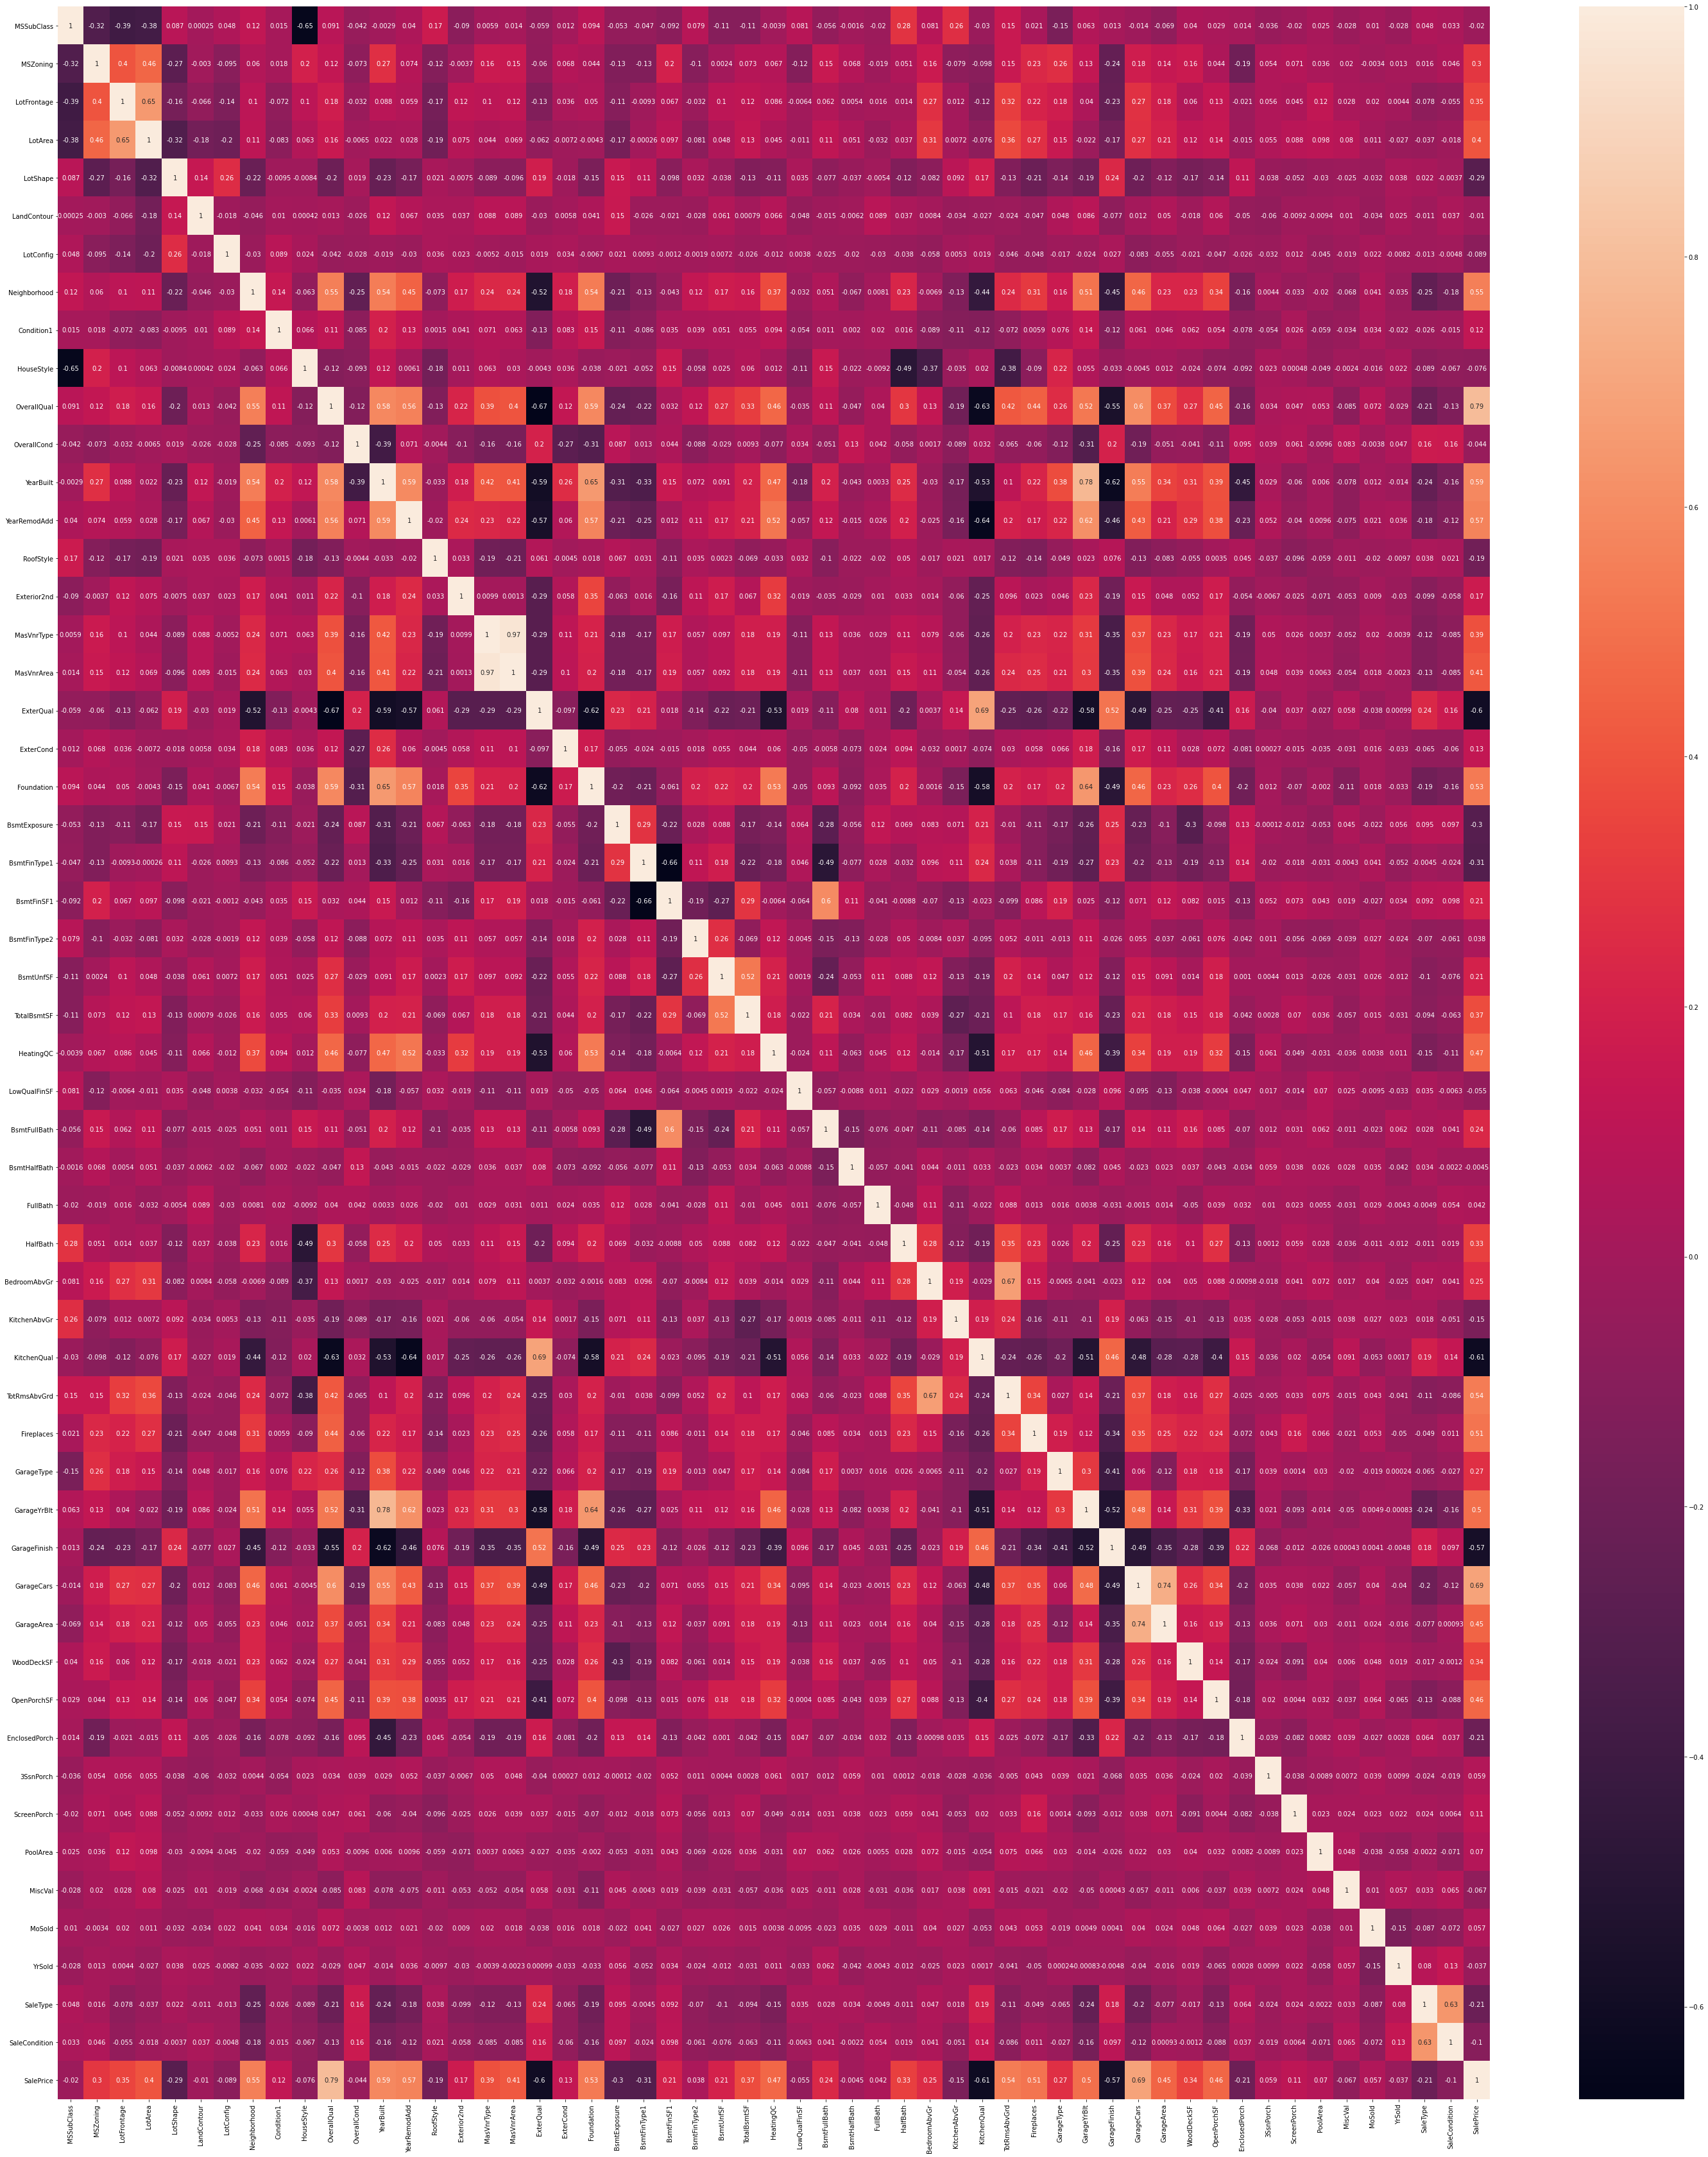

In [ ]:
fig, ax = plt.subplots(figsize=(50, 60))
sns.heatmap(df.corr(),annot=True,ax=ax)

#FEATURE ENGG. COMPLETED 
#MODEL BUILDING STARTING

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=54)

In [ ]:
X_train

MSSubClass  MSZoning  LotFrontage  ...  YrSold  SaleType  SaleCondition
223     3.044522         1     4.262680  ...    2009         1              0
745     4.110874         1     4.248495  ...    2008         1              1
1300    4.110874         1     4.248495  ...    2009         1              1
505     4.510860         0     4.110874  ...    2009         0              1
158     4.110874         0     4.615121  ...    2010         1              1
...          ...       ...          ...  ...     ...       ...            ...
1344    4.110874         1     4.454347  ...    2007         0              0
1047    3.044522         1     4.060443  ...    2008         1              1
898     3.044522         1     4.615121  ...    2010         0              0
1349    4.262680         0     3.931826  ...    2008         1              1
1135    3.433987         0     4.110874  ...    2007         1              1

[1168 rows x 54 columns]

In [ ]:
y_train

223     11.482477
745     12.610874
1300    12.323860
505     11.732069
158     12.448631
          ...    
1344    11.956559
1047    11.884496
898     13.323929
1349    11.711785
1135    11.532738
Name: SalePrice, Length: 1168, dtype: float64

In [ ]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1168, 54) (1168,)
Test (292, 54) (292,)


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
Lr= LinearRegression()
Lr.fit(X_train,y_train)
y_predicted = Lr.predict(X_test)

r2 = r2_score(y_test, y_predicted)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_predicted))

r2 score: 0.8028049292604222
Mean_square_error 0.02804236512877833


In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0,0.1,0.5,1,2,5,10],
              'normalize': [True,False]}

LassoReg = Lasso()

Lasso_reg= GridSearchCV(LassoReg, parameters, scoring='neg_mean_squared_error',cv=20)
Lasso_reg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.047086844019748, tolerance: 0.01765996919583348
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/di

GridSearchCV(cv=20, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.1, 0.5, 1, 2, 5, 10],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
#best estimator
print(Lasso_reg.best_estimator_)

#best model
best_model = Lasso_reg.best_estimator_
best_model.fit(X_train,y_train)
y_predicted = best_model.predict(X_test)

Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.185605045835679, tolerance: 0.01912733208727977
  positive)


In [ ]:
r2 = r2_score(y_test, y_predicted)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_predicted))

r2 score: 0.8028049292604217
Mean_square_error 0.028042365128778404


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[0.001,0.01,0.1,0.2,0.4, 0.5,0.7,0.9,1,5,10],
              'normalize': [True,False]}

RidgeReg = Ridge()

Ridge_reg= GridSearchCV(RidgeReg, parameters, scoring='neg_mean_squared_error',cv=20)
Ridge_reg.fit(X_train,y_train)


GridSearchCV(cv=20, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9, 1,
                                   5, 10],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X_train,y_train)
y_predicted = best_model.predict(X_test)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)


In [ ]:
r2 = r2_score(y_test, y_predicted)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_predicted))

r2 score: 0.8038893874699344
Mean_square_error 0.027888148428715866


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor

Dt = DecisionTreeRegressor(criterion='mse',max_depth=25, min_samples_split=5,
                           min_samples_leaf=5,max_features=None, random_state=34)
Dt.fit(X_train,y_train)
y_predicted = Dt.predict(X_test)
r2 = r2_score(y_test, y_predicted)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_predicted))

r2 score: 0.6435405245879902
Mean_square_error 0.05069075370711147


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


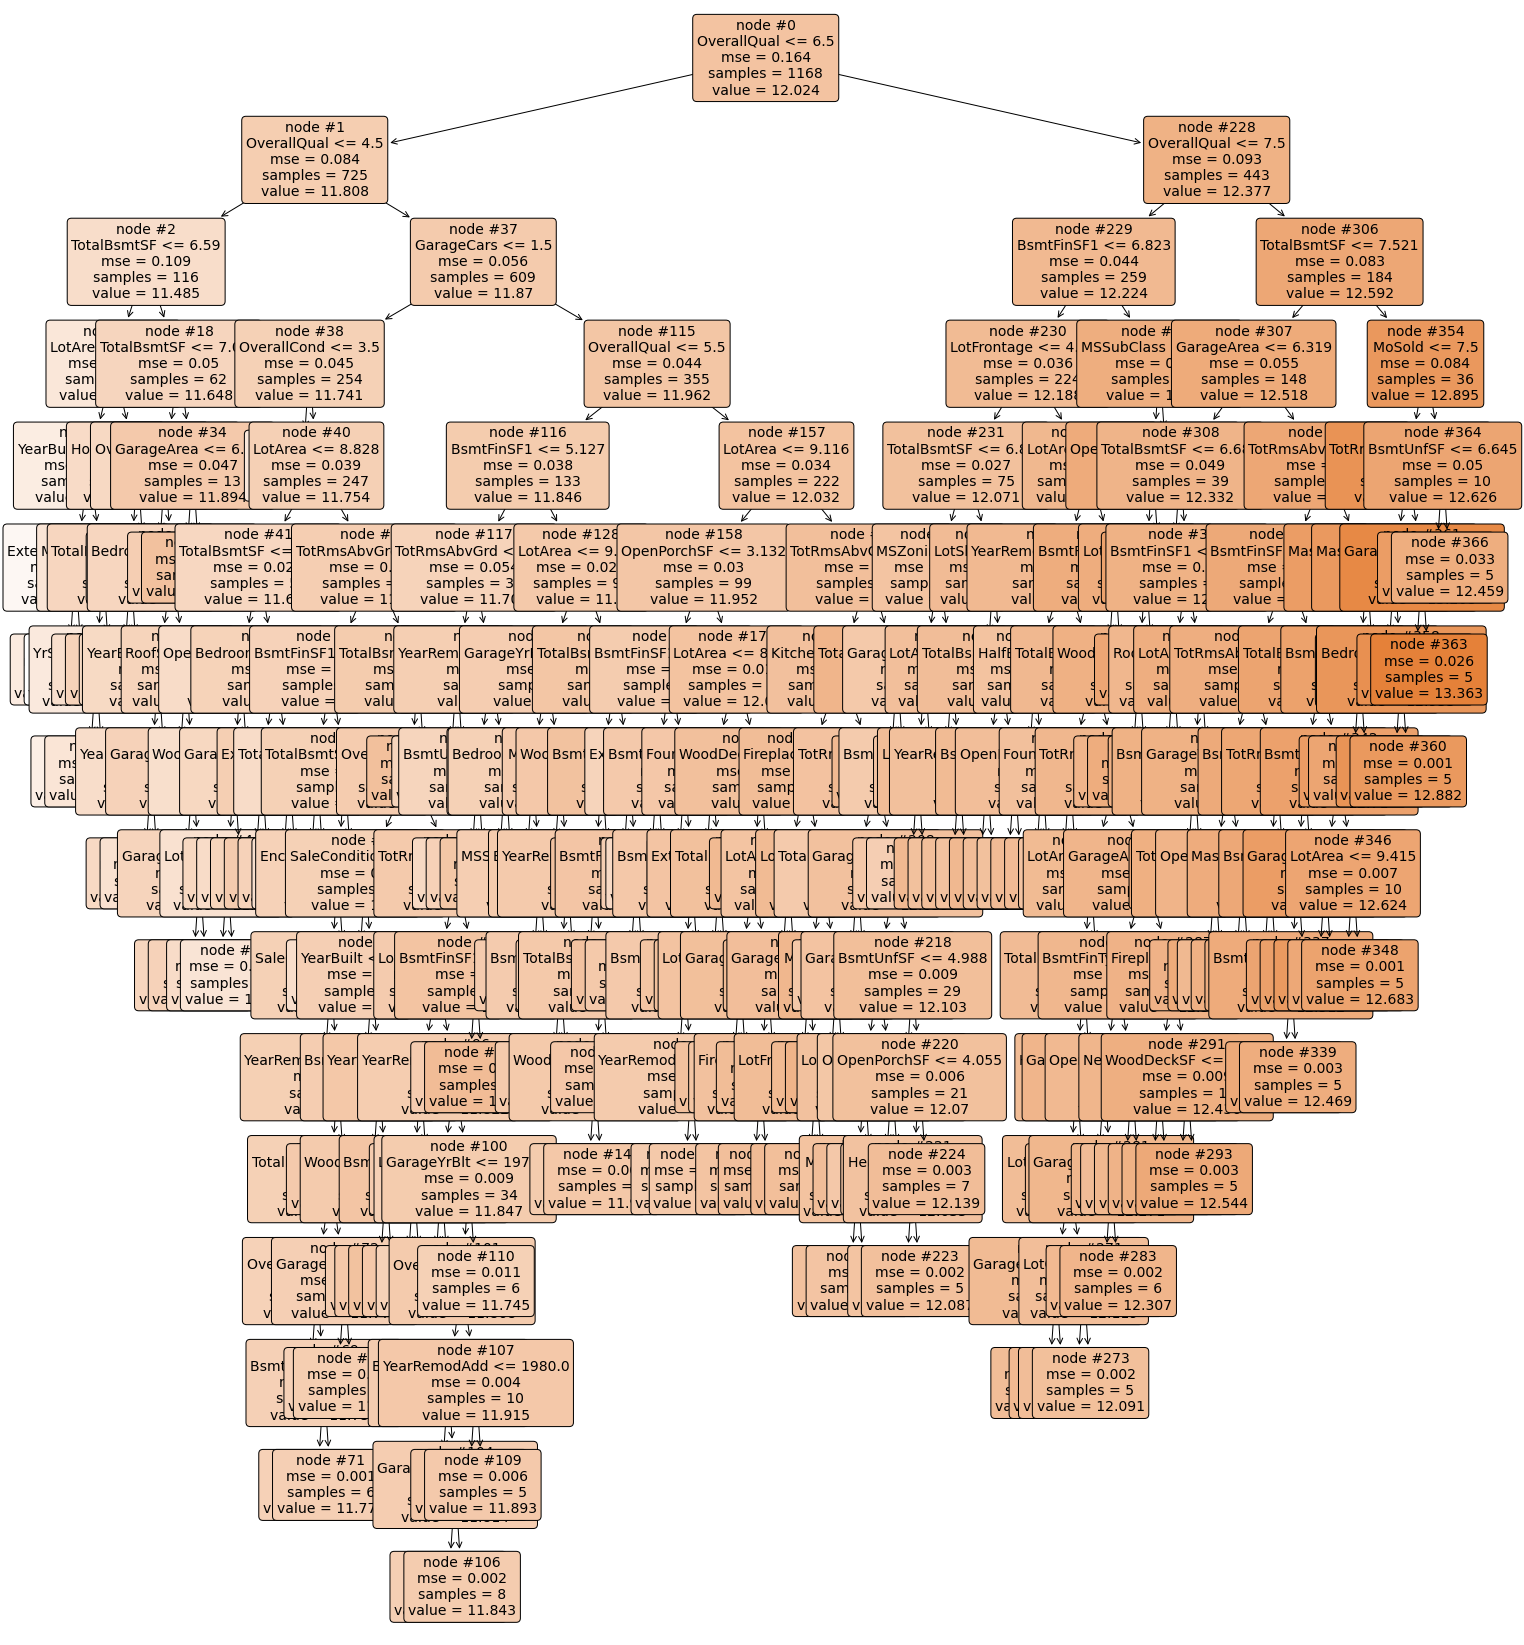

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize = (25,30))
a = plot_tree(Dt,feature_names = X_train.columns,
                 class_names = Dt.classes_ ,
                 filled = True,
                 rounded = True,
                 fontsize = 14,
                 node_ids = True
                 )

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_pred))

r2 score: 0.8599359483118713
Mean_square_error 0.019917979004869097


In [ ]:
n_estimators = [100,200,700,1000]
max_features = ['auto', 'sqrt']
max_depth = [2,5,10,15]
min_samples_split = [2, 5, 10, 15, 50]
#min_samples_leaf = [1, 2, 5, 10]
#bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }

In [ ]:
rf = RandomForestRegressor()

rf_random= GridSearchCV(rf, random_grid, scoring='neg_mean_squared_error',cv=5)


In [ ]:
rf_random.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
print(rf_random.best_params_)

{'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred1 = rf_random.predict(X_test)
r2 = r2_score(y_test, y_pred1)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_pred1))

r2 score: 0.8599359483118713
Mean_square_error 0.019917979004869097


In [ ]:
# XgBoost
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

In [ ]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 5-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 3,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
reg.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
y_predicted = regressor.predict(X_test)
r2 = r2_score(y_test, y_predicted)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_predicted))

In [ ]:
#ANN
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
df.shape

In [ ]:
# Initialising the ANN
#classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 50, kernel_initializer= 'he_uniform',activation='relu',input_dim = 54))

# Adding the second hidden layer
classifier.add(Dense(units= 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss="binary_crossentropy", optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs= 1000)

In [ ]:
y_predicted = classifier.predict(X_test)
r2 = r2_score(y_test, y_predicted)
print('r2 score:', r2)
print("Mean_square_error",mean_squared_error(y_test, y_predicted))